In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plot 
import seaborn as sb 

%matplotlib inline 

In [2]:
# taking input of the data
results = pd.read_csv('results.csv', names = ['resultId', 'raceId', 'driverId','constructorId','number', 'grid', 'position ', 'positionText', 'positionOrder', 'points','laps','time','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed', 'statusId '])
races = pd.read_csv('races.csv', names = ['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date','fp3_time', 'quali_date', 'quali_time', 'sprint_date','sprint_time'])
constructors_data =  pd.read_csv('constructors.csv', names = ['constructorId' , 'constructorRef', 'name' , 'nationality', 'url'])
drivers_data =  pd.read_csv('drivers.csv', names = ['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'])
circuits_data =  pd.read_csv('circuits.csv', names = ['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat' , 'lng', 'alt', 'url'] )
constructor_results =  pd.read_csv('constructor_results.csv', names = ['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'] )
                                   

In [3]:
# merging columns 
drivers_data['driver_name'] =  drivers_data['forename'] + " " +drivers_data['surname']
drivers_data.drop(['forename', 'surname'], axis = 1, inplace = True)

In [4]:
# merging the dataset
df = pd.merge (results , races [[ 'raceId', 'year', 'round', 'circuitId', 'name']] , on = 'raceId', how ='left')
df = pd.merge (df , constructors_data[[ 'constructorId', 'name', 'nationality']], on = 'constructorId' , how = 'left')
df = pd.merge (df , drivers_data [['driverId', 'driver_name', 'nationality']], on = 'driverId' , how = 'left')
df = pd.merge (df , circuits_data [['circuitId', 'name', 'location' , 'alt']], on ='circuitId' , how ='left')


In [5]:
# droping unneccessary columns 
df.drop([ 'driverId' ,'constructorId', 'number', 'position ', 'positionText', 'fastestLap', 'statusId ' , 'circuitId'], axis =1, inplace = True )

In [6]:
# droping unneccessary columns 
df.drop(['resultId'], axis =1, inplace = True )

In [7]:
# droping first row
df.drop(df.index[0] , inplace = True)

In [8]:
# renaming the columns
df=df.rename (columns = {'rank' : 'fastestLapRank' , 'name_x' : 'grandPrix', 'name_y' : 'constructor_name', 'nationality_x':'constructorNationality', 'nationality_y':'driverNationality','name':'circuitName','location':'circuitLocation','alt':'locationAlt'})

In [9]:
# renaming the columns
df=df.rename (columns = {'year':'season', 'positionOrder':'finalPosition'})

In [10]:
#repositioning columns
df = df[['season', 'round', 'grandPrix' , 'circuitName' , 'circuitLocation' , 'locationAlt','driver_name', 'driverNationality', 'constructor_name', 'constructorNationality' ,'finalPosition' , 'grid' , 'points', 'laps' , 'time' , 'milliseconds', 'fastestLapRank' ,'fastestLapTime', 'fastestLapSpeed' , 'raceId' ]]

In [11]:
#replacing null values
df.time.replace('\\N', np.nan, inplace =True)
df.milliseconds.replace('\\N', np.nan, inplace =True)
df.fastestLapRank.replace('\\N', np.nan, inplace =True)
df.fastestLapTime.replace('\\N', np.nan, inplace =True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace =True)
df['locationAlt'].replace('\\N', np.nan, inplace=True)

In [12]:
#changing datatypes
df.fastestLapRank = df.fastestLapRank.astype(float) 
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.milliseconds = df.milliseconds.astype(float)
df.finalPosition = df.finalPosition.astype(int)
df['season'] = df['season'].astype(int)
df['round'] = df['round'].astype(int)
df['locationAlt'] = df['locationAlt'].astype(float)
df['grid'] = df['grid'].astype(int)
df['points'] = df['points'].astype(float)

In [13]:
#sorting values
df = df.sort_values(by = ['season', 'round', 'finalPosition'], ascending = [False , True , True])

In [14]:
#resetting index
df.reset_index(drop = True , inplace = True)

In [15]:
# dataframe information
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  25840 non-null  int32  
 1   round                   25840 non-null  int32  
 2   grandPrix               25840 non-null  object 
 3   circuitName             25840 non-null  object 
 4   circuitLocation         25840 non-null  object 
 5   locationAlt             25800 non-null  float64
 6   driver_name             25840 non-null  object 
 7   driverNationality       25840 non-null  object 
 8   constructor_name        25840 non-null  object 
 9   constructorNationality  25840 non-null  object 
 10  finalPosition           25840 non-null  int32  
 11  grid                    25840 non-null  int32  
 12  points                  25840 non-null  float64
 13  laps                    25840 non-null  object 
 14  time                    7088 non-null 

season                      int32
round                       int32
grandPrix                  object
circuitName                object
circuitLocation            object
locationAlt               float64
driver_name                object
driverNationality          object
constructor_name           object
constructorNationality     object
finalPosition               int32
grid                        int32
points                    float64
laps                       object
time                       object
milliseconds              float64
fastestLapRank            float64
fastestLapTime             object
fastestLapSpeed           float64
raceId                     object
dtype: object

In [16]:
df.head(60)

season  round                 grandPrix                     circuitName  \
0     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
1     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
2     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
3     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
4     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
5     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
6     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
7     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
8     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
9     2022      1        Bahrain Grand Prix   Bahrain International Circuit   
10    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
11    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
12    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
13    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
14    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
15    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
16    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
17    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
18    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
19    2022      1        Bahrain Grand Prix   Bahrain International Circuit   
20    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
21    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
22    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
23    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
24    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
25    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
26    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
27    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
28    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
29    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
30    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
31    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
32    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
33    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
34    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
35    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
36    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
37    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
38    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
39    2022      2  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
40    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
41    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
42    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
43    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
44    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
45    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
46    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
47    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
48    2022      3     Australian Grand Prix  Albert Park Grand Prix Circuit   
49    2022      3     Australian Grand Prix  Albert Pa

In [17]:
# Count of races on different circuits 
circuit_races_count = df.groupby('circuitName')['season'].nunique()
circuit_races_count = circuit_races_count.sort_values (ascending = False)
circuit_races_count.head(60)

circuitName
Autodromo Nazionale di Monza             72
Circuit de Monaco                        68
Silverstone Circuit                      56
Circuit de Spa-Francorchamps             55
Circuit Gilles Villeneuve                41
Nürburgring                              41
Autódromo José Carlos Pace               39
Hockenheimring                           37
Hungaroring                              37
Red Bull Ring                            34
Suzuka Circuit                           32
Circuit de Barcelona-Catalunya           32
Circuit Park Zandvoort                   32
Autodromo Enzo e Dino Ferrari            30
Albert Park Grand Prix Circuit           25
Autódromo Hermanos Rodríguez             22
Watkins Glen                             20
Autódromo Juan y Oscar Gálvez            20
Kyalami                                  20
Indianapolis Motor Speedway              19
Sepang International Circuit             19
Circuit Paul Ricard                      18
Bahrain Internationa

In [18]:
# Finding out top 25 circuits where most races have been conducted  
top_25_circuits = circuit_races_count.head(25)
top_25_circuits

circuitName
Autodromo Nazionale di Monza      72
Circuit de Monaco                 68
Silverstone Circuit               56
Circuit de Spa-Francorchamps      55
Circuit Gilles Villeneuve         41
Nürburgring                       41
Autódromo José Carlos Pace        39
Hockenheimring                    37
Hungaroring                       37
Red Bull Ring                     34
Suzuka Circuit                    32
Circuit de Barcelona-Catalunya    32
Circuit Park Zandvoort            32
Autodromo Enzo e Dino Ferrari     30
Albert Park Grand Prix Circuit    25
Autódromo Hermanos Rodríguez      22
Watkins Glen                      20
Autódromo Juan y Oscar Gálvez     20
Kyalami                           20
Indianapolis Motor Speedway       19
Sepang International Circuit      19
Circuit Paul Ricard               18
Bahrain International Circuit     18
Circuit de Nevers Magny-Cours     18
Shanghai International Circuit    16
Name: season, dtype: int64

In [19]:
# creating a dataframe from top 25 circuits 
top_circuits_df = df[df['circuitName'].isin(top_25_circuits.index)]
top_circuits_df

season  round           grandPrix                    circuitName  \
0        2022      1  Bahrain Grand Prix  Bahrain International Circuit   
1        2022      1  Bahrain Grand Prix  Bahrain International Circuit   
2        2022      1  Bahrain Grand Prix  Bahrain International Circuit   
3        2022      1  Bahrain Grand Prix  Bahrain International Circuit   
4        2022      1  Bahrain Grand Prix  Bahrain International Circuit   
...       ...    ...                 ...                            ...   
25835    1950      7  Italian Grand Prix   Autodromo Nazionale di Monza   
25836    1950      7  Italian Grand Prix   Autodromo Nazionale di Monza   
25837    1950      7  Italian Grand Prix   Autodromo Nazionale di Monza   
25838    1950      7  Italian Grand Prix   Autodromo Nazionale di Monza   
25839    1950      7  Italian Grand Prix   Autodromo Nazionale di Monza   

      circuitLocation  locationAlt      driver_name driverNationality  \
0              Sakhir          7.0  Charles Leclerc        Monegasque   
1              Sakhir          7.0     Carlos Sainz           Spanish   
2              Sakhir          7.0   Lewis Hamilton           British   
3              Sakhir          7.0   George Russell           British   
4              Sakhir          7.0  Kevin Magnussen            Danish   
...               ...          ...              ...               ...   
25835           Monza        162.0  Consalvo Sanesi           Italian   
25836           Monza        162.0    Robert Manzon            French   
25837           Monza        162.0      Prince Bira              Thai   
25838           Monza        162.0     Paul Pietsch            German   
25839           Monza        162.0   Felice Bonetto           Italian   

      constructor_name constructorNationality  finalPosition  grid  points  \
0              Ferrari                Italian              1     1    26.0   
1              Ferrari                Italian              2     3    18.0   
2             Mercedes                 German              3     5    15.0   
3             Mercedes                 German              4     9    12.0   
4         Haas F1 Team               American              5     7    10.0   
...                ...                    ...            ...   ...     ...   
25835       Alfa Romeo                  Swiss             23     4     0.0   
25836            Simca                 French             24    10     0.0   
25837         Maserati                Italian             25    15     0.0   
25838         Maserati                Italian             26    27     0.0   
25839           Milano                Italian             27    23     0.0   

      laps     time  milliseconds  fastestLapRank fastestLapTime  \
0       57  37:33.6     5853584.0             1.0        01:34.6   
1       57    5.598     5859182.0             3.0        01:35.7   
2       57    9.675     5863259.0             5.0        01:36.2   
3       57   11.211     5864795.0             6.0        01:36.3   
4       57   14.754     5868338.0             8.0        01:36.6   
...    ...      ...           ...             ...            ...   
25835   11      NaN           NaN             NaN            NaN   
25836    7      NaN           NaN             NaN            NaN   
25837    1      NaN           NaN             NaN            NaN   
25838    0      NaN           NaN             NaN            NaN   
25839    0      NaN           NaN             NaN            NaN   

       fastestLapSpeed raceId  
0              206.018   1074  
1              203.501   1074  
2              202.469   1074  
3              202.313   1074  
4              201.641   1074  
...                ...    ...  
25835              NaN    839  
25836              NaN    839  
25837              NaN    839  
25838              NaN    839  
25839              NaN    839  

[19661 rows x 20 columns]

season                                  1950          1951          1952  \
circuitName                                                                
Albert Park Grand Prix Circuit           NaN           NaN           NaN   
Autodromo Enzo e Dino Ferrari            NaN           NaN           NaN   
Autodromo Nazionale di Monza    1.033547e+07  9.771600e+06  1.032495e+07   
Autódromo Hermanos Rodríguez             NaN           NaN           NaN   
Autódromo José Carlos Pace               NaN           NaN           NaN   
Autódromo Juan y Oscar Gálvez            NaN           NaN           NaN   
Bahrain International Circuit            NaN           NaN           NaN   
Circuit Gilles Villeneuve                NaN           NaN           NaN   
Circuit Park Zandvoort                   NaN           NaN  1.045333e+07   
Circuit Paul Ricard                      NaN           NaN           NaN   
Circuit de Barcelona-Catalunya           NaN           NaN           NaN   
Circuit de M

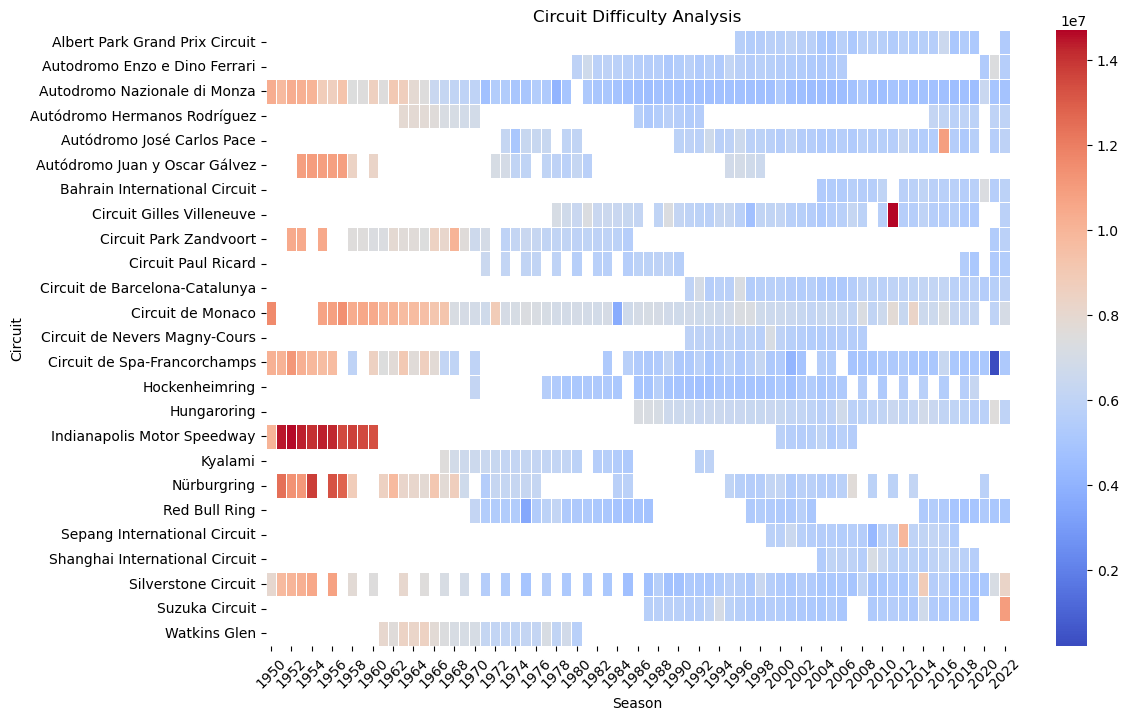

In [20]:
#Circuit difficulty analysis

circuit_avg_times = top_circuits_df.groupby(['circuitName', 'season'])['milliseconds'].mean().reset_index()
pivot_data = circuit_avg_times.pivot(index='circuitName', columns='season', values='milliseconds')
print(pivot_data.head(60))

# Create a heatmap
plot.figure(figsize=(12, 8))
sb.heatmap(data=pivot_data, cmap='coolwarm', linewidths=0.5)
plot.title('Circuit Difficulty Analysis')
plot.xlabel('Season')
plot.ylabel('Circuit')
plot.xticks(rotation=45)
plot.show()

['Bahrain International Circuit', 'Albert Park Grand Prix Circuit', 'Autodromo Enzo e Dino Ferrari', 'Circuit de Barcelona-Catalunya', 'Circuit de Monaco', 'Circuit Gilles Villeneuve', 'Silverstone Circuit', 'Red Bull Ring', 'Circuit Paul Ricard', 'Hungaroring', 'Circuit de Spa-Francorchamps', 'Circuit Park Zandvoort', 'Autodromo Nazionale di Monza', 'Suzuka Circuit', 'Autódromo Hermanos Rodríguez', 'Autódromo José Carlos Pace', 'Nürburgring', 'Shanghai International Circuit', 'Hockenheimring', 'Sepang International Circuit', 'Circuit de Nevers Magny-Cours', 'Indianapolis Motor Speedway']


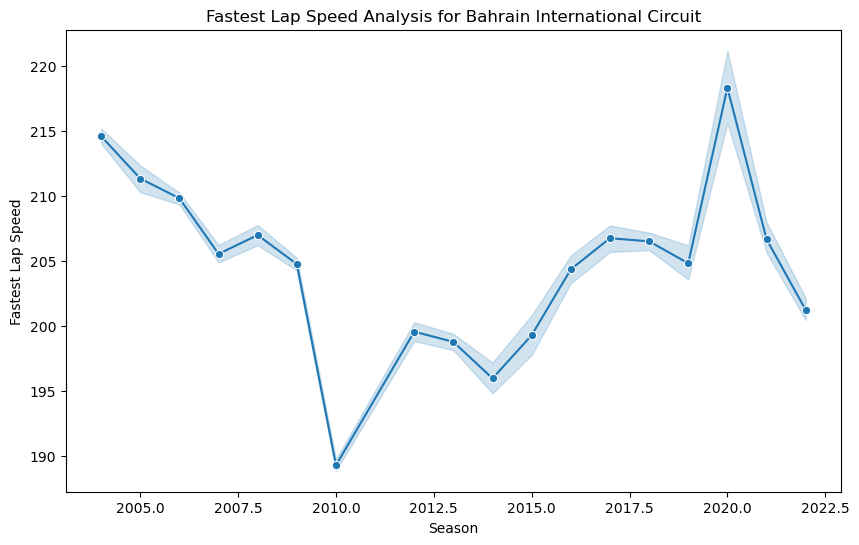

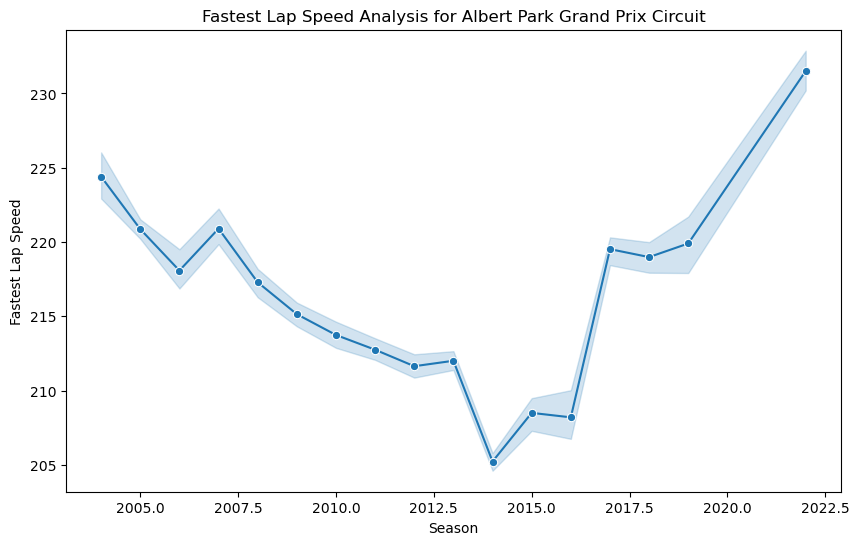

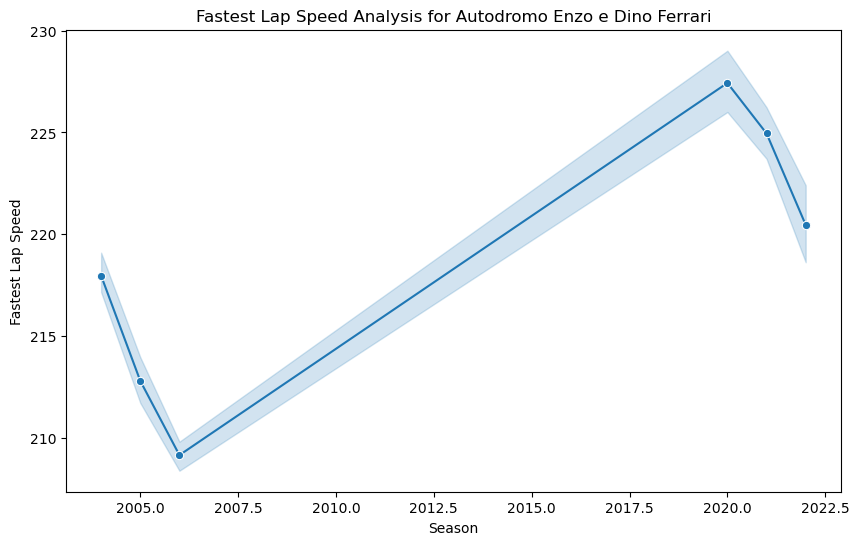

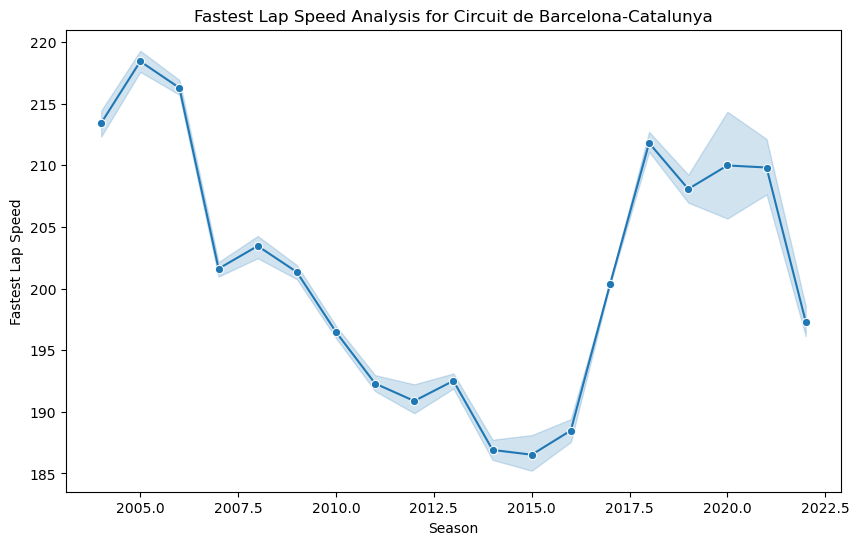

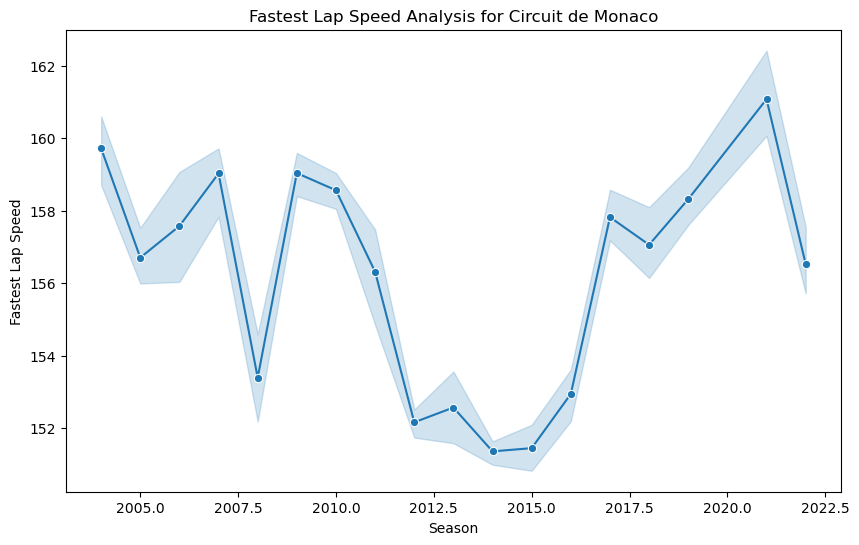

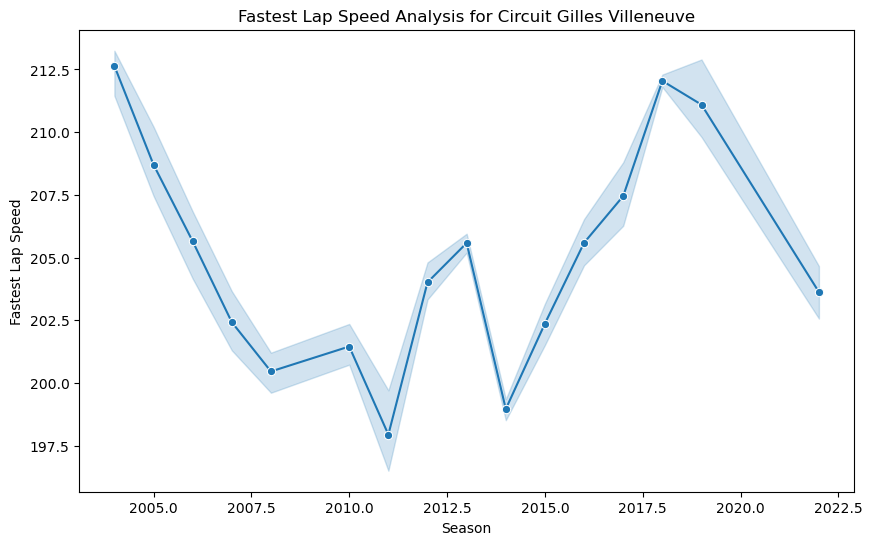

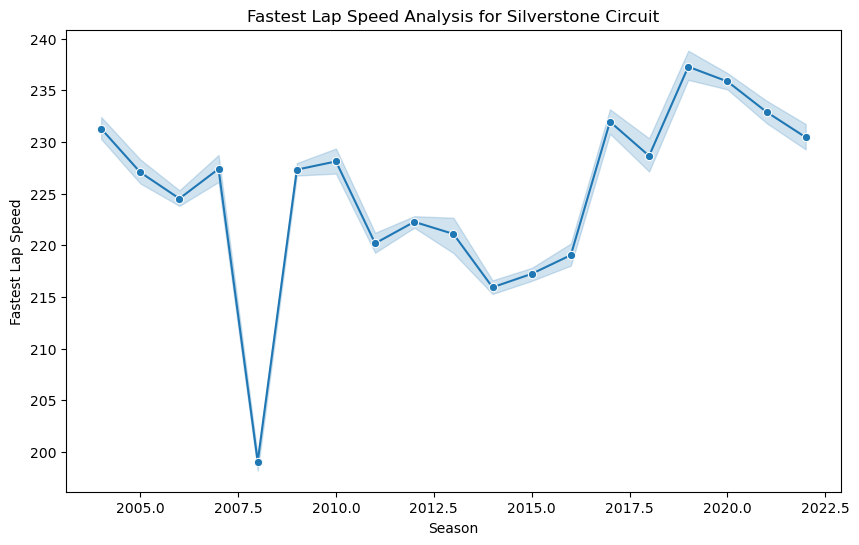

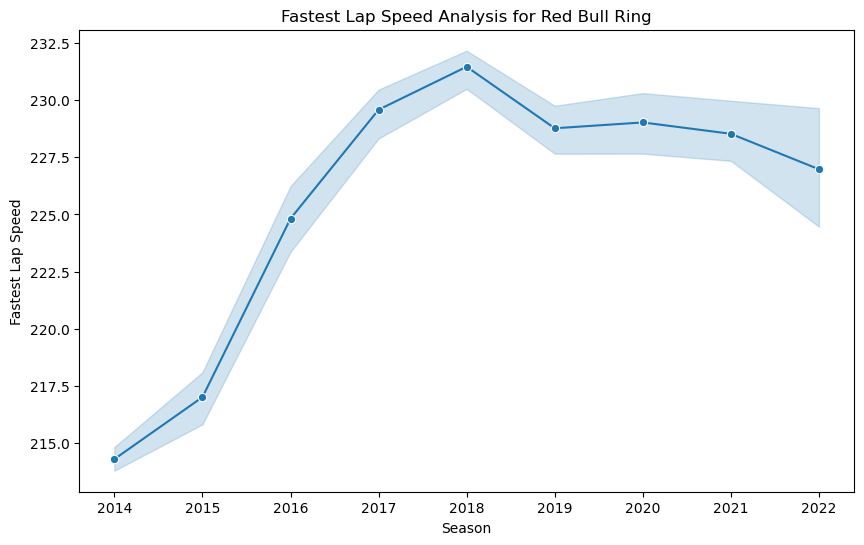

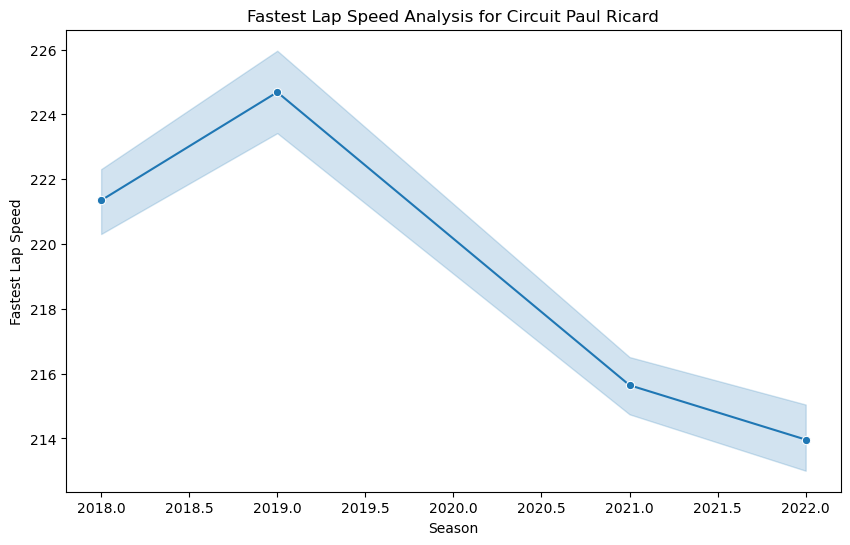

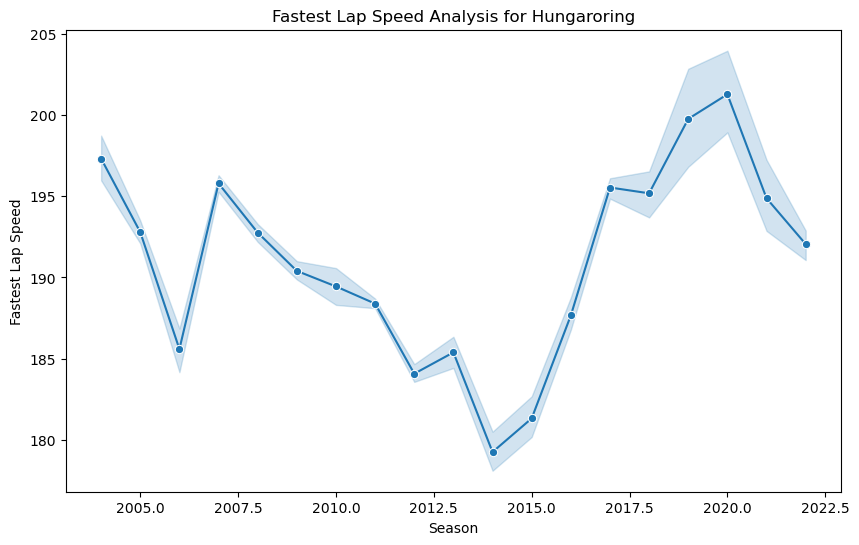

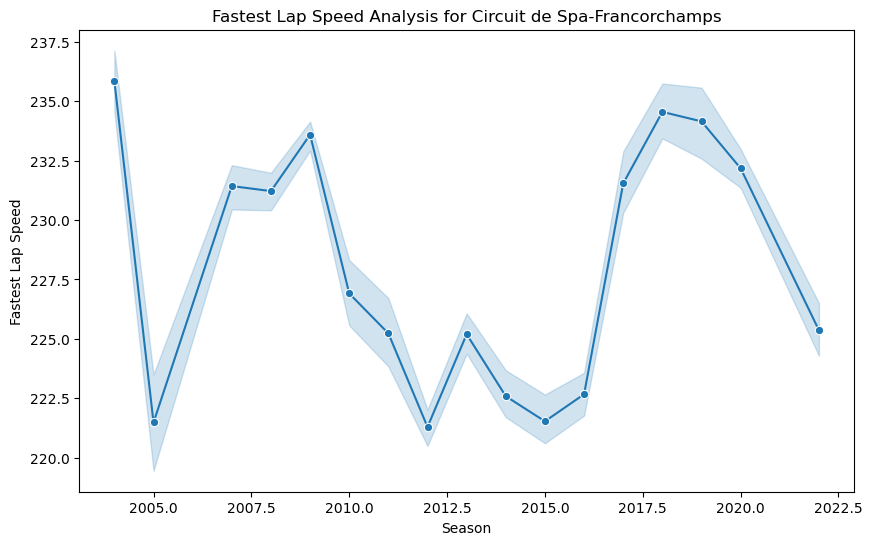

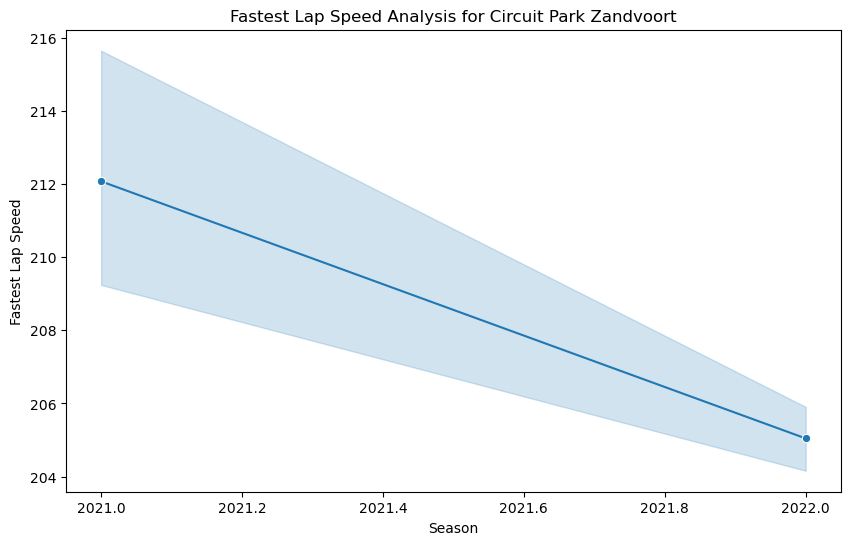

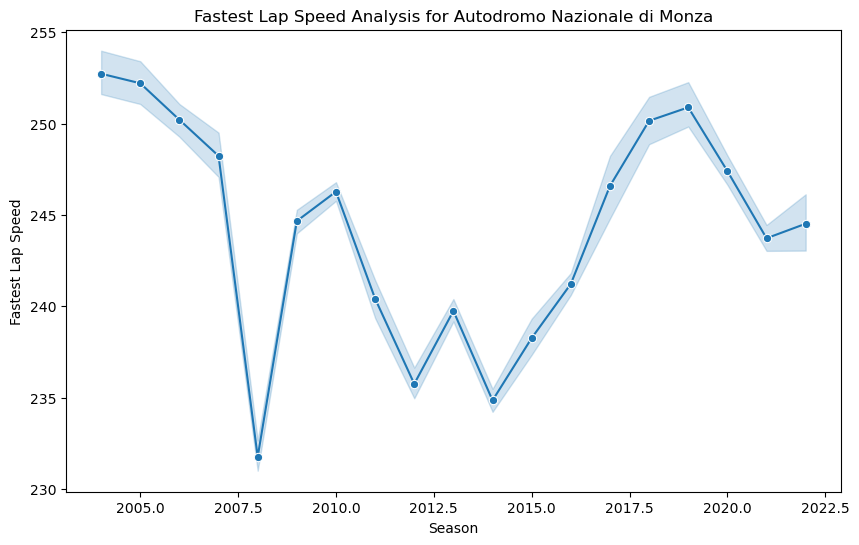

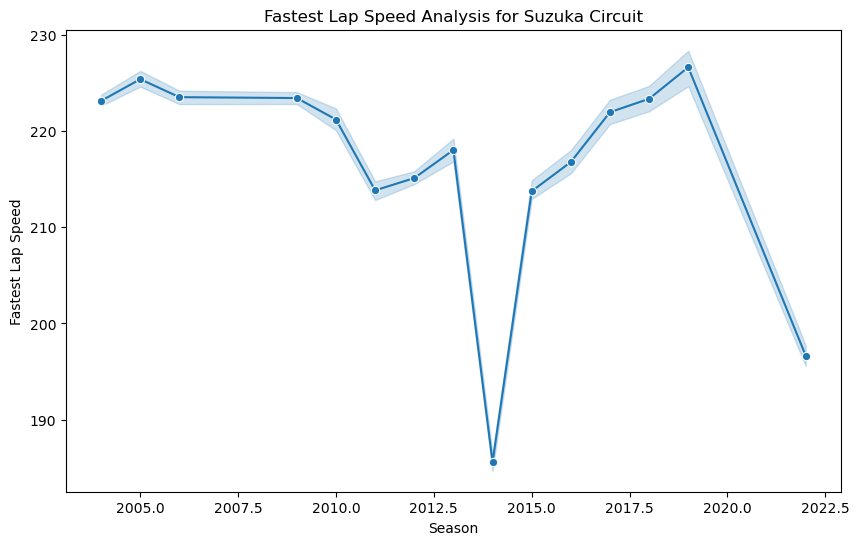

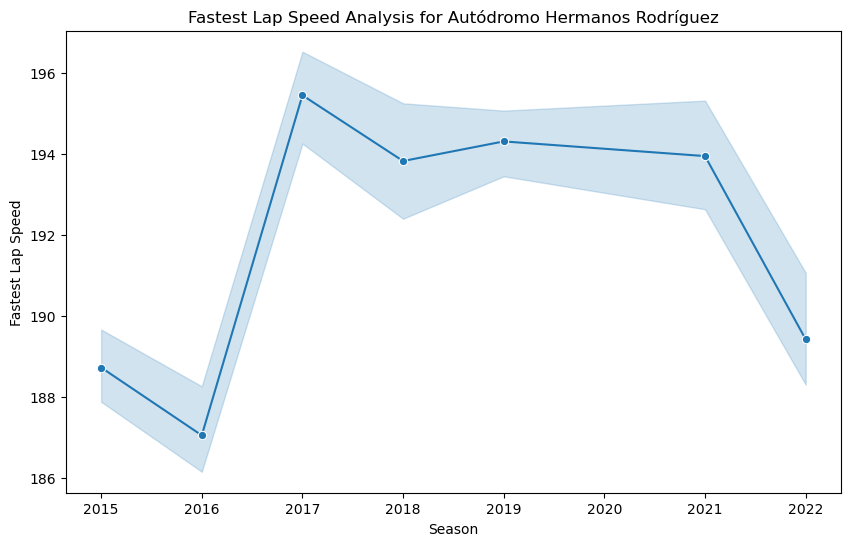

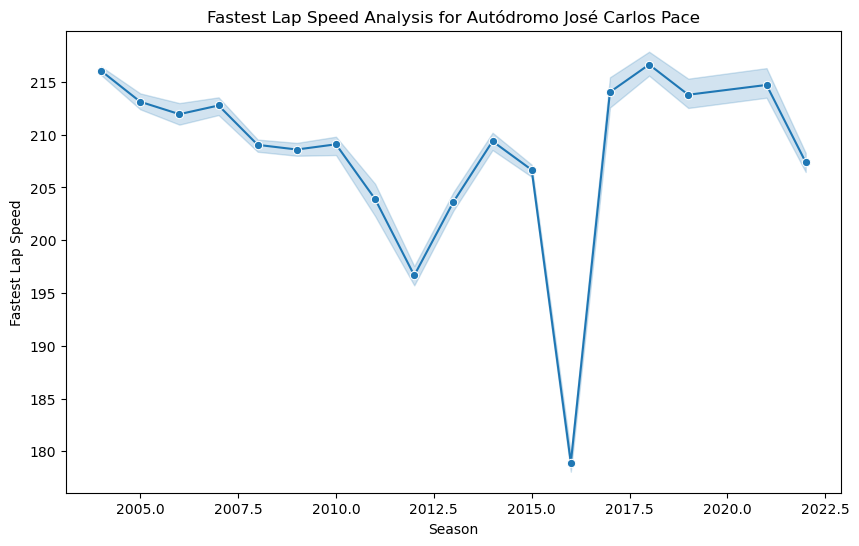

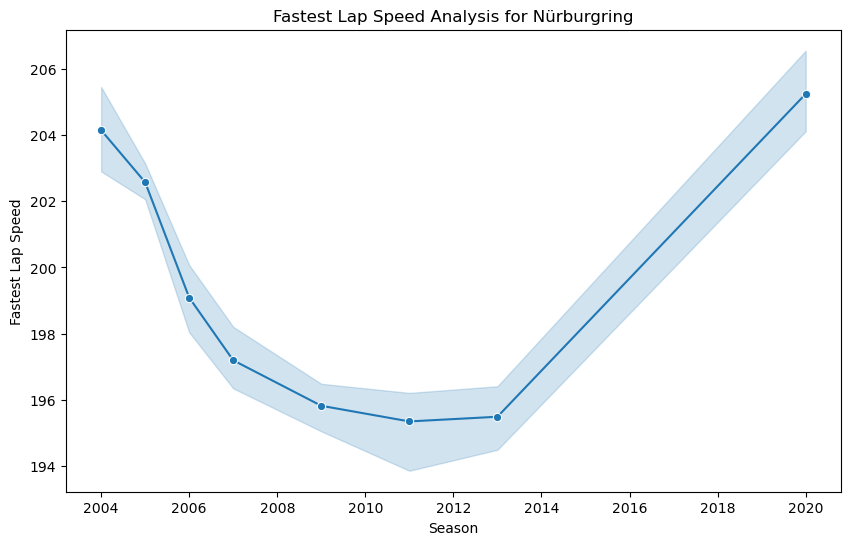

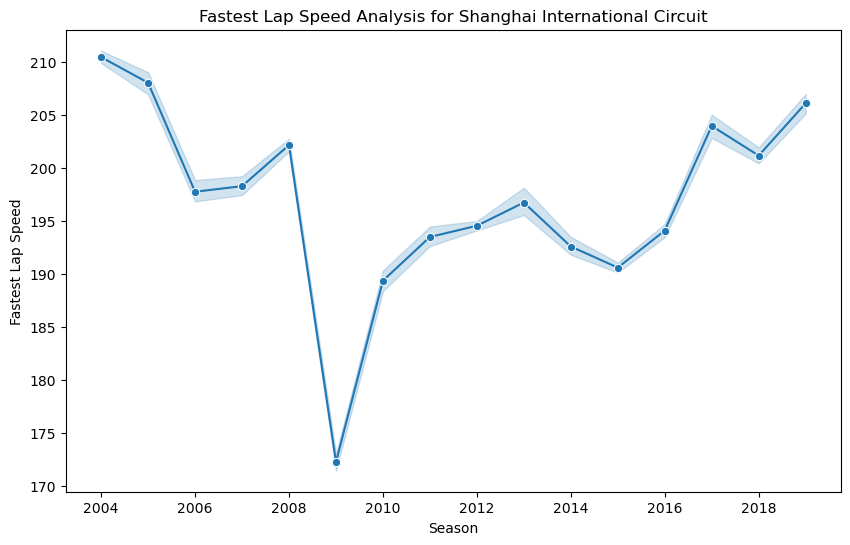

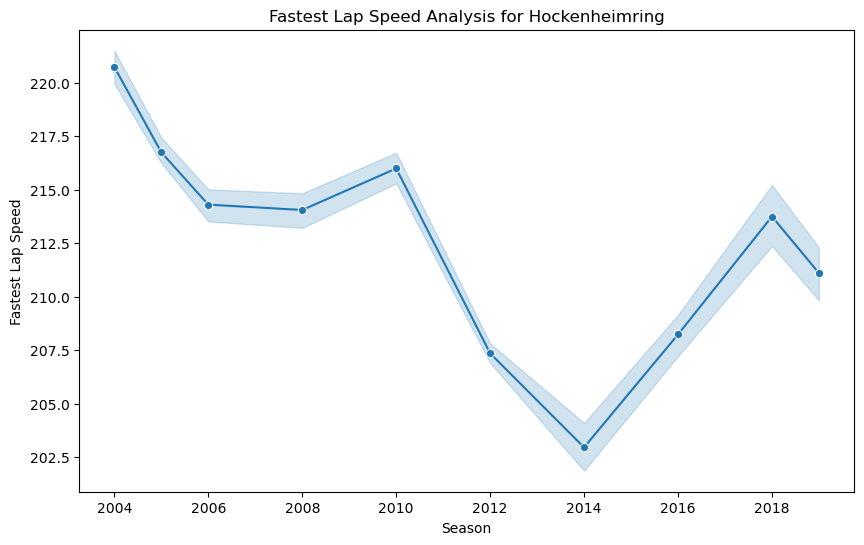

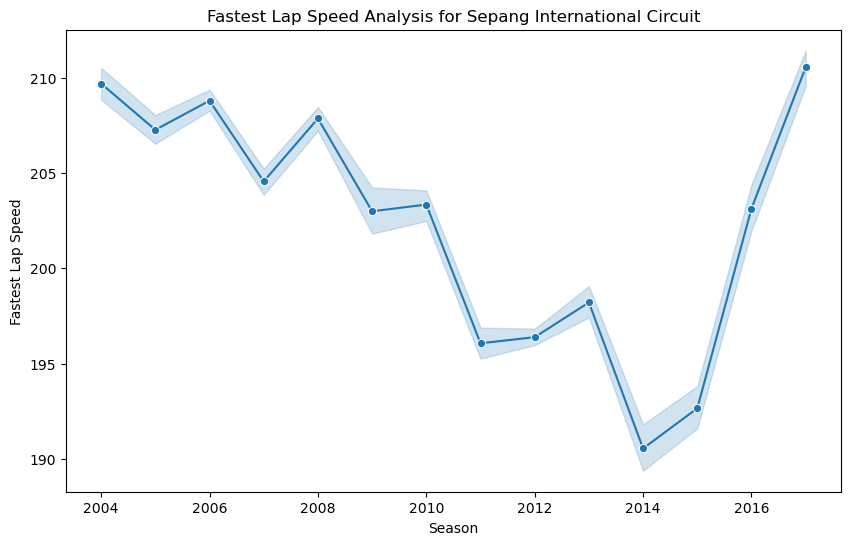

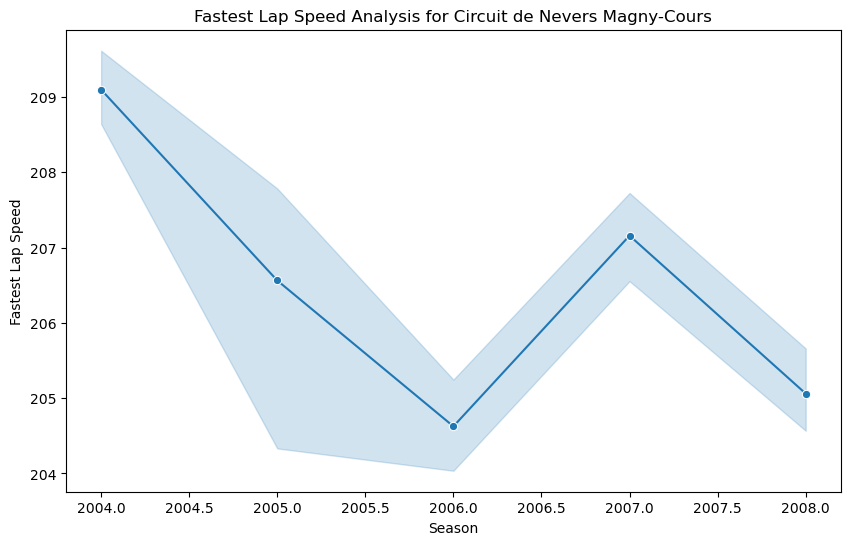

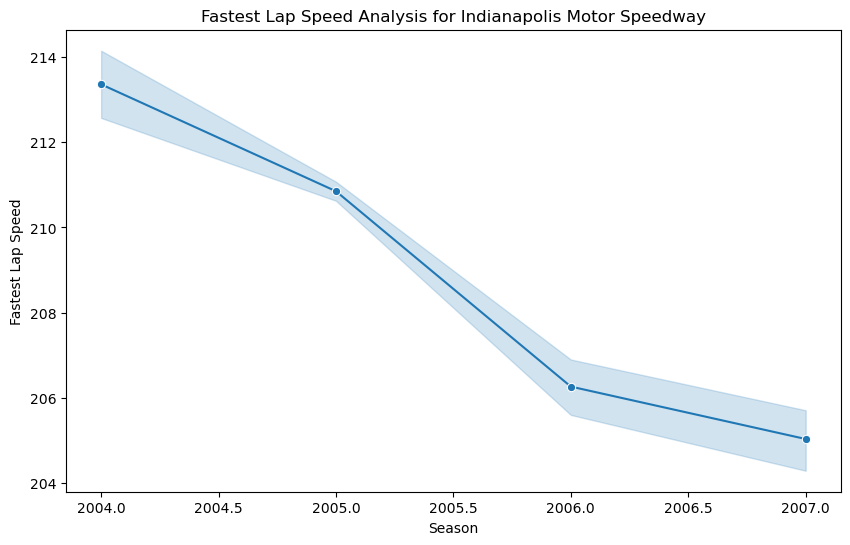

In [21]:
#Fastest lap speed analysis for each 25 top circuits 

# Get a list of unique circuit names
circuit_names = top_circuits_df['circuitName'].unique()

#Because this circuits do not have FastestLapTime data 
circuits_to_remove = ['Autódromo Juan y Oscar Gálvez','Kyalami','Watkins Glen']

circuit_names = [name for name in circuit_names if name not in circuits_to_remove]

print(circuit_names)
for circuit in circuit_names:
    circuit_data = top_circuits_df[top_circuits_df['circuitName'] == circuit]
    circuit_data = circuit_data.dropna()
    # Create a new Seaborn figure
    plot.figure(figsize=(10, 6))
    
    # Use Seaborn's lineplot to create the chart
    sb.lineplot(x='season', y='fastestLapSpeed', data=circuit_data, marker='o')
    
    # Set labels and title
    plot.xlabel('Season')
    plot.ylabel('Fastest Lap Speed')
    plot.title(f'Fastest Lap Speed Analysis for {circuit}')
    
    # Save or show the plot
    plot.show()  # Uncomment this line to display the plot interactively


In [22]:
#Correlation analysis between grid position and final race position 

#fetching grid and finalPosition for calculating correlation
correlation_grid_finalPosition = ['finalPosition' , 'grid']
correlation_grid_finalPosition_df = top_circuits_df[correlation_grid_finalPosition]
correlation_coefficient = correlation_grid_finalPosition_df['grid'].corr(correlation_grid_finalPosition_df['finalPosition'])
print('Correlation Between Grid and Final Position of Driver in the race = ' , correlation_coefficient)

Correlation Between Grid and Final Position of Driver in the race =  0.16575934540264853


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x700 with 0 Axes>

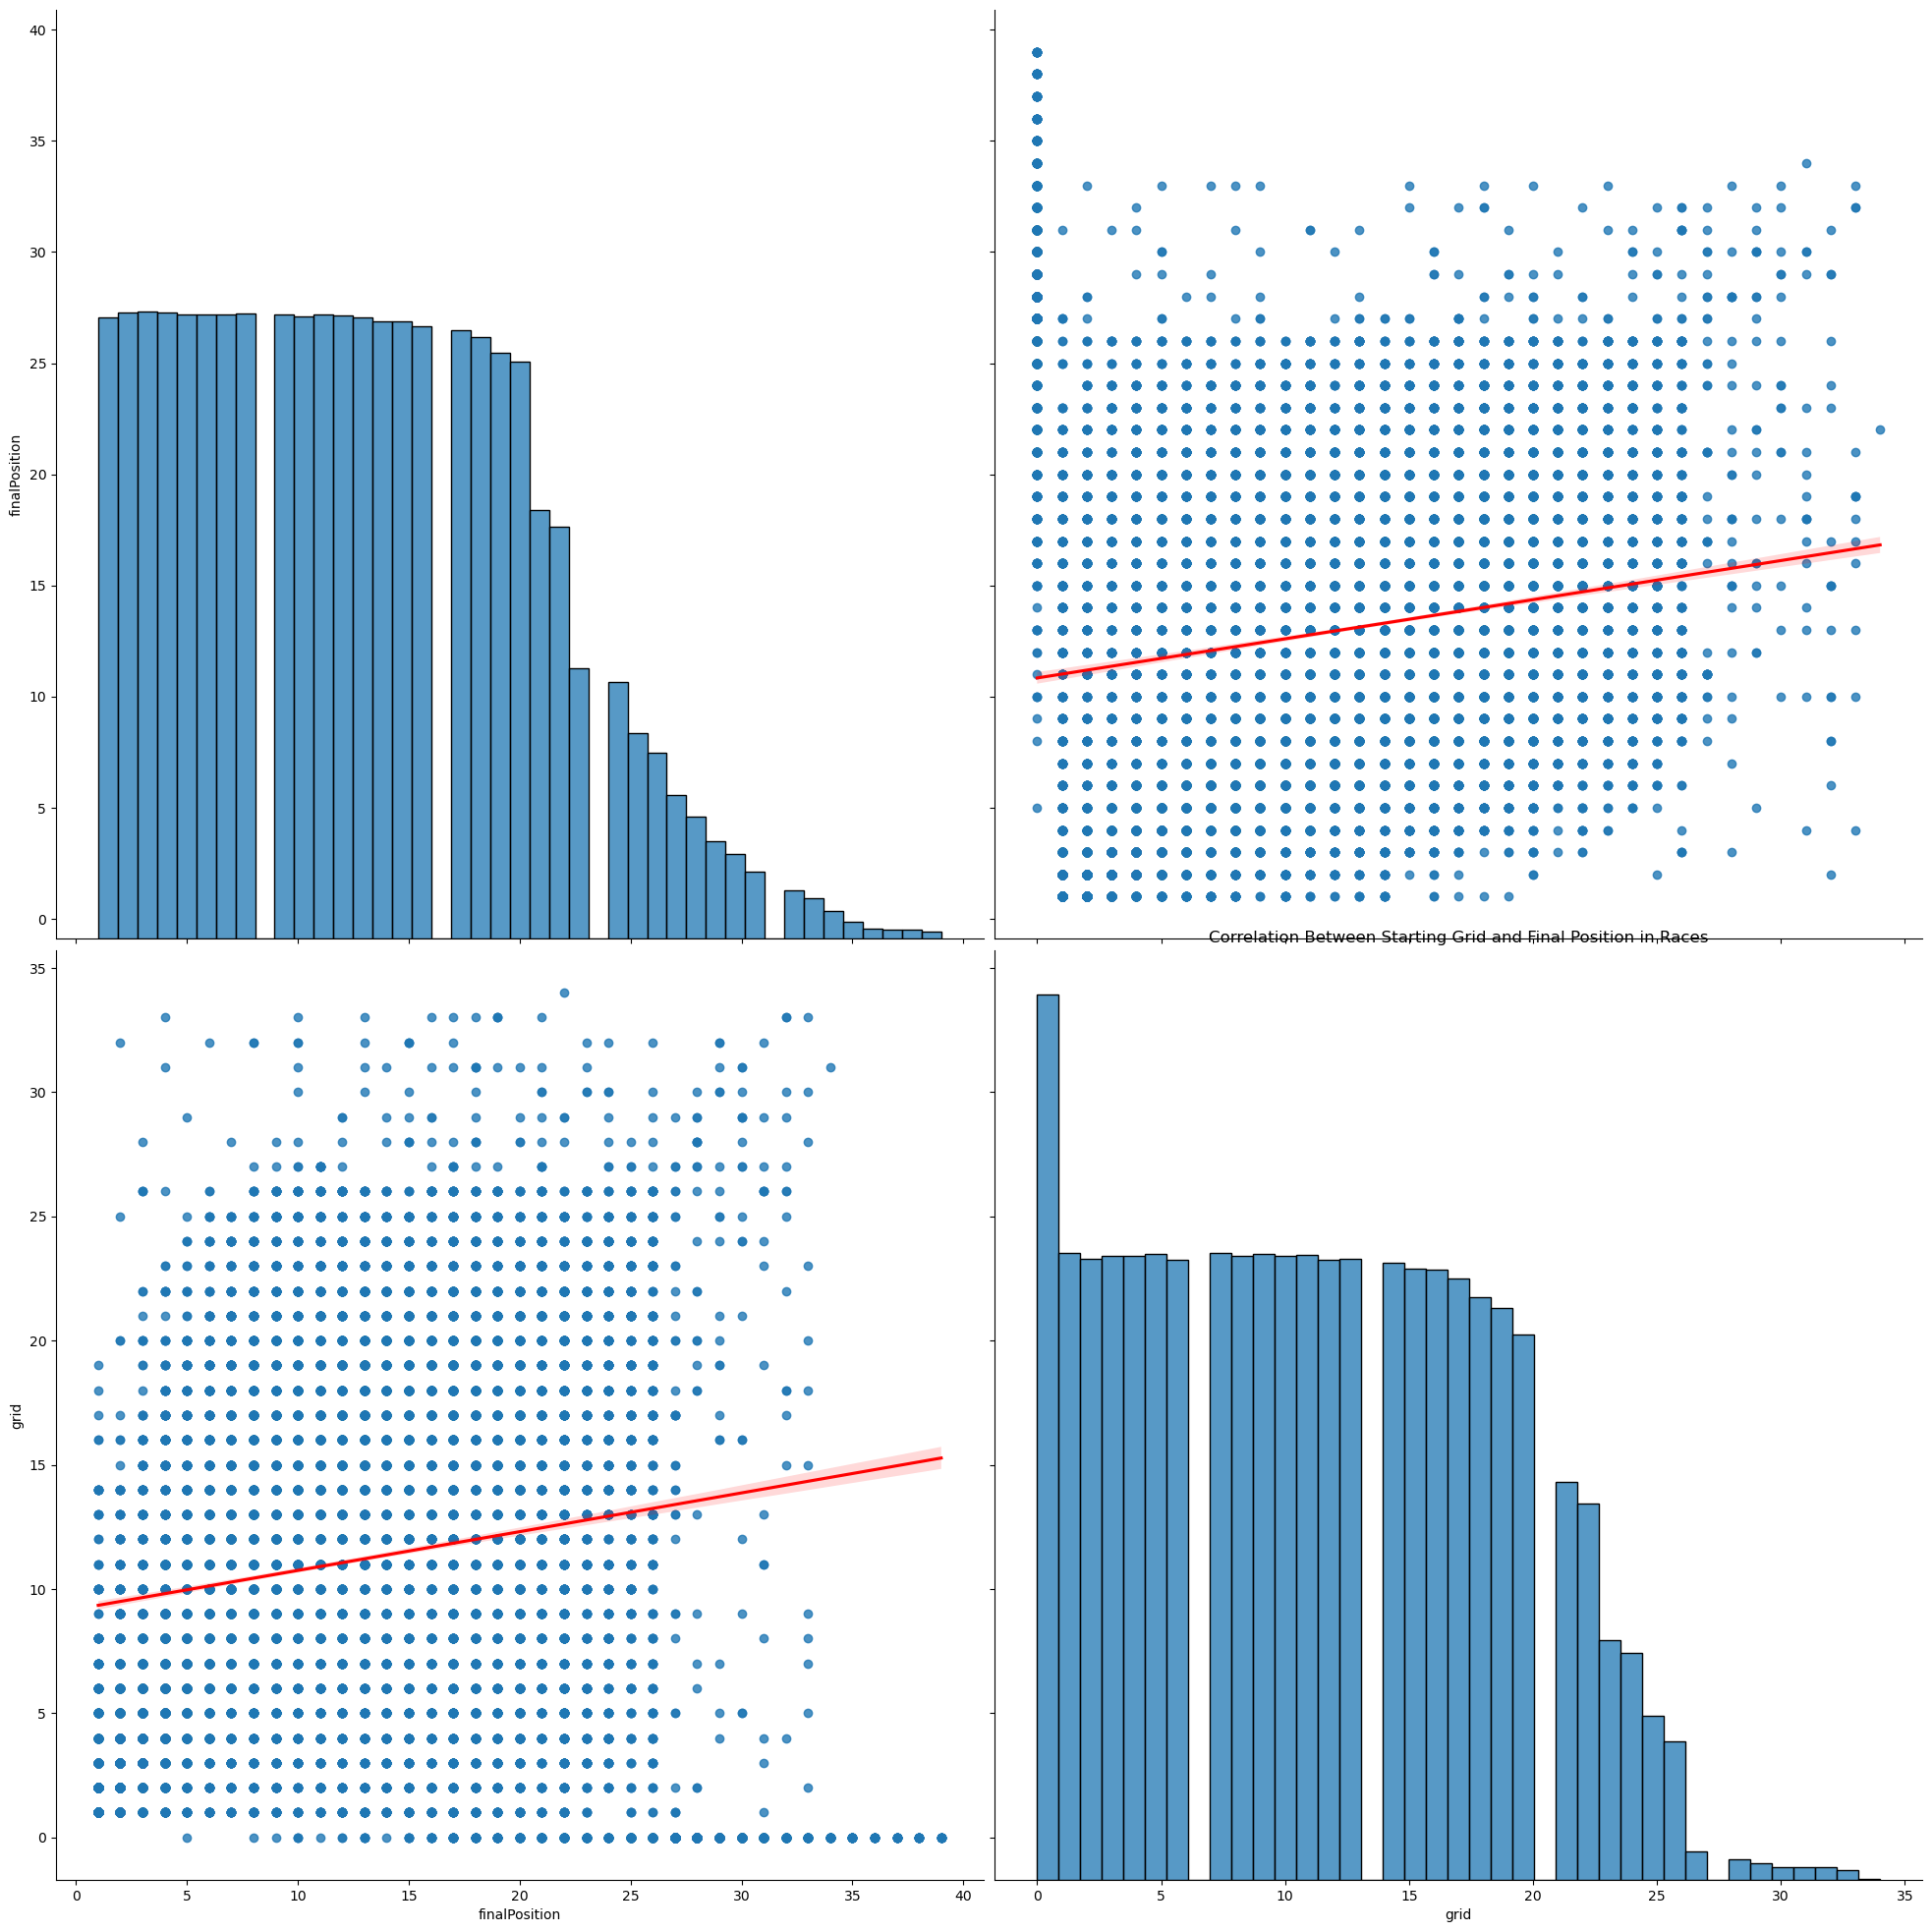

In [23]:
# Creating a scatter plot for visualizing correlation and plotting a regression line 
plot.figure(figsize =(10,7))
# sb.scatterplot(data = correlation_grid_finalPosition_df , x = 'grid', y = 'finalPosition')
sb.pairplot(correlation_grid_finalPosition_df,kind='reg', height = 10 , plot_kws = {'line_kws':{'color':'red'}})
#sb.stripplot(data=correlation_grid_finalPosition_df , x = 'grid' , y = 'finalPosition' )
plot.xlabel('Starting Grid Position')
plot.ylabel('Final Race Position')
plot.title('Correlation Between Starting Grid and Final Position in Races')
plot.grid(True)
plot.show

In [24]:
# Win analysis of top drivers for each top 25 circuits 

# fetching wins of drivers on circuits 

driver_wins_count = top_circuits_df[top_circuits_df['finalPosition']==1].groupby(['circuitLocation' , 'circuitName','driver_name'])['finalPosition'].count()
driver_wins_count.head(60)

circuitLocation  circuitName                    driver_name       
Budapest         Hungaroring                    Ayrton Senna          3
                                                Damon Hill            2
                                                Daniel Ricciardo      1
                                                Esteban Ocon          1
                                                Fernando Alonso       1
                                                Heikki Kovalainen     1
                                                Jacques Villeneuve    2
                                                Jenson Button         2
                                                Kimi Räikkönen        1
                                                Lewis Hamilton        8
                                                Mark Webber           1
                                                Max Verstappen        1
                                                Michael Schumacher   

In [25]:
# fetching top 10 drivers from each circuit who have won the most 

top_10_sorted_driver_wins = driver_wins_count.groupby('circuitName').nlargest(10).reset_index(level=0, drop=True)
# top_10_sorted_driver_wins = top_10_sorted_driver_wins.reset_index()
top_10_sorted_driver_wins

circuitLocation  circuitName                     driver_name       
Melbourne        Albert Park Grand Prix Circuit  Michael Schumacher    4
                                                 Jenson Button         3
                                                 Sebastian Vettel      3
                                                 David Coulthard       2
                                                 Kimi Räikkönen        2
                                                                      ..
New York State   Watkins Glen                    Alan Jones            1
                                                 Emerson Fittipaldi    1
                                                 François Cevert       1
                                                 Gilles Villeneuve     1
                                                 Innes Ireland         1
Name: finalPosition, Length: 248, dtype: int64

In [26]:
# Making a dataframe of the 10 drivers from top 25 circuits  

top_circuits_top_drivers_df = pd.DataFrame(top_10_sorted_driver_wins)
top_circuits_top_drivers_df = top_circuits_top_drivers_df.reset_index()
top_circuits_top_drivers_df.rename(columns = {'finalPosition': 'No of Wins'}, inplace= True)
top_circuits_top_drivers_df.head(60)

circuitLocation                     circuitName         driver_name  \
0        Melbourne  Albert Park Grand Prix Circuit  Michael Schumacher   
1        Melbourne  Albert Park Grand Prix Circuit       Jenson Button   
2        Melbourne  Albert Park Grand Prix Circuit    Sebastian Vettel   
3        Melbourne  Albert Park Grand Prix Circuit     David Coulthard   
4        Melbourne  Albert Park Grand Prix Circuit      Kimi Räikkönen   
5        Melbourne  Albert Park Grand Prix Circuit      Lewis Hamilton   
6        Melbourne  Albert Park Grand Prix Circuit        Nico Rosberg   
7        Melbourne  Albert Park Grand Prix Circuit     Charles Leclerc   
8        Melbourne  Albert Park Grand Prix Circuit          Damon Hill   
9        Melbourne  Albert Park Grand Prix Circuit        Eddie Irvine   
10           Imola   Autodromo Enzo e Dino Ferrari  Michael Schumacher   
11           Imola   Autodromo Enzo e Dino Ferrari         Alain Prost   
12           Imola   Autodromo Enzo e Dino Ferrari        Ayrton Senna   
13           Imola   Autodromo Enzo e Dino Ferrari          Damon Hill   
14           Imola   Autodromo Enzo e Dino Ferrari      Max Verstappen   
15           Imola   Autodromo Enzo e Dino Ferrari       Nelson Piquet   
16           Imola   Autodromo Enzo e Dino Ferrari       Nigel Mansell   
17           Imola   Autodromo Enzo e Dino Ferrari     David Coulthard   
18           Imola   Autodromo Enzo e Dino Ferrari       Didier Pironi   
19           Imola   Autodromo Enzo e Dino Ferrari     Elio de Angelis   
20           Monza    Autodromo Nazionale di Monza      Lewis Hamilton   
21           Monza    Autodromo Nazionale di Monza  Michael Schumacher   
22           Monza    Autodromo Nazionale di Monza         Alain Prost   
23           Monza    Autodromo Nazionale di Monza         Juan Fangio   
24           Monza    Autodromo Nazionale di Monza       Nelson Piquet   
25           Monza    Autodromo Nazionale di Monza     Ronnie Peterson   
26           Monza    Autodromo Nazionale di Monza  Rubens Barrichello   
27           Monza    Autodromo Nazionale di Monza    Sebastian Vettel   
28           Monza    Autodromo Nazionale di Monza       Stirling Moss   
29           Monza    Autodromo Nazionale di Monza      Alberto Ascari   
30     Mexico City    Autódromo Hermanos Rodríguez      Max Verstappen   
31     Mexico City    Autódromo Hermanos Rodríguez         Alain Prost   
32     Mexico City    Autódromo Hermanos Rodríguez           Jim Clark   
33     Mexico City    Autódromo Hermanos Rodríguez      Lewis Hamilton   
34     Mexico City    Autódromo Hermanos Rodríguez       Nigel Mansell   
35     Mexico City    Autódromo Hermanos Rodríguez        Ayrton Senna   
36     Mexico City    Autódromo Hermanos Rodríguez          Dan Gurney   
37     Mexico City    Autódromo Hermanos Rodríguez         Denny Hulme   
38     Mexico City    Autódromo Hermanos Rodríguez      Gerhard Berger   
39     Mexico City    Autódromo Hermanos Rodríguez         Graham Hill   
40       São Paulo      Autódromo José Carlos Pace  Michael Schumacher   
41       São Paulo      Autódromo José Carlos Pace      Lewis Hamilton   
42       São Paulo      Autódromo José Carlos Pace    Sebastian Vettel   
43       São Paulo      Autódromo José Carlos Pace        Ayrton Senna   
44       São Paulo      Autódromo José Carlos Pace  Emerson Fittipaldi   
45       São Paulo      Autódromo José Carlos Pace        Felipe Massa   
46       São Paulo      Autódromo José Carlos Pace  Juan Pablo Montoya   
47       São Paulo      Autódromo José Carlos Pace         Mark Webber   
48       São Paulo      Autódromo José Carlos Pace       Mika Häkkinen   
49       São Paulo      Autódromo José Carlos Pace        Nico Rosberg   
50    Buenos Aires   Autódromo Juan y Oscar Gálvez         Juan Fangio   
51    Buenos Aires   Autódromo Juan y Oscar Gálvez          Damon Hill   
52    Buenos Aires   Autódromo Juan y Oscar Gálvez  Emerson Fittipaldi   
53    B

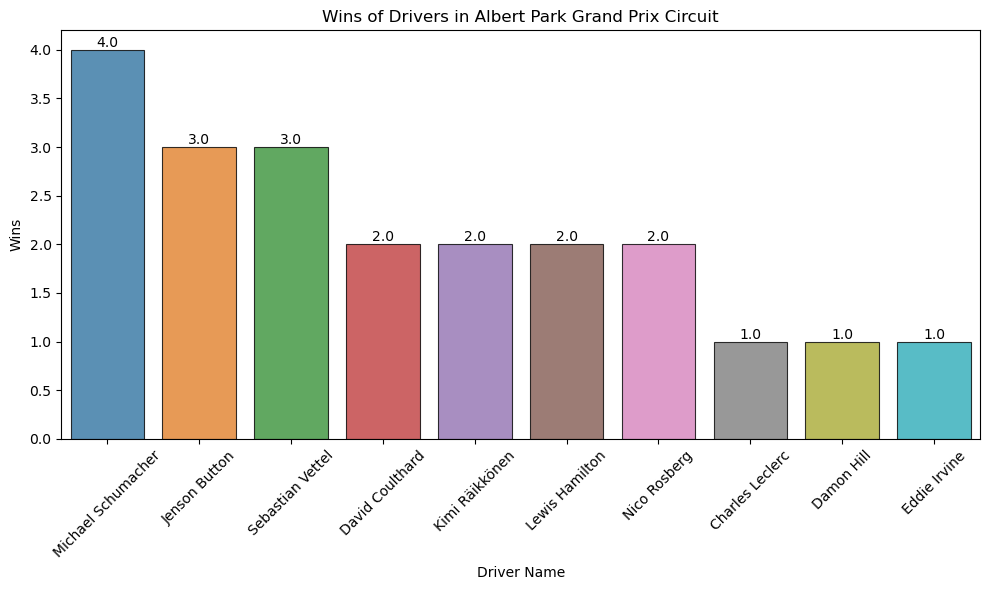

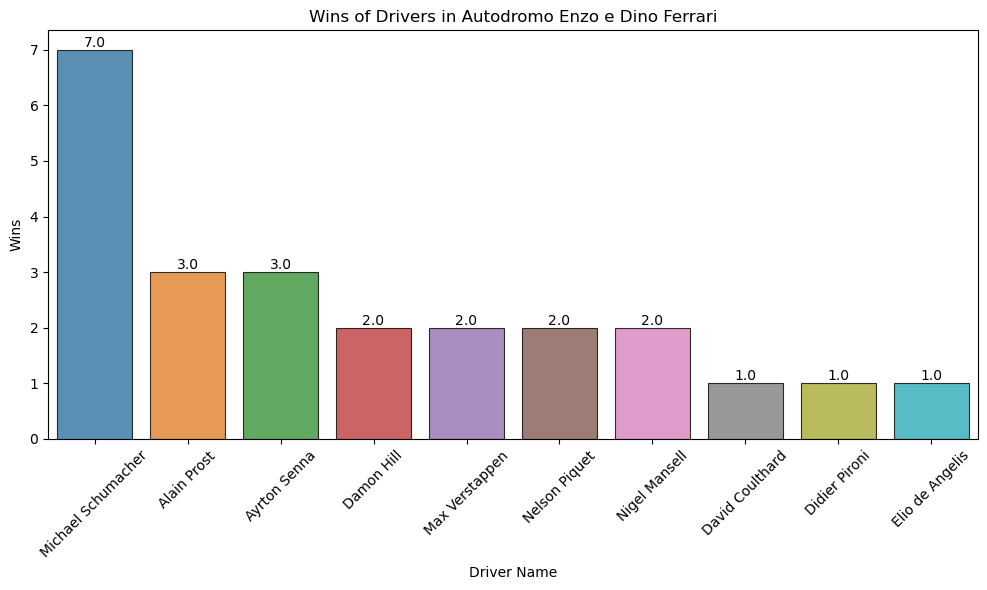

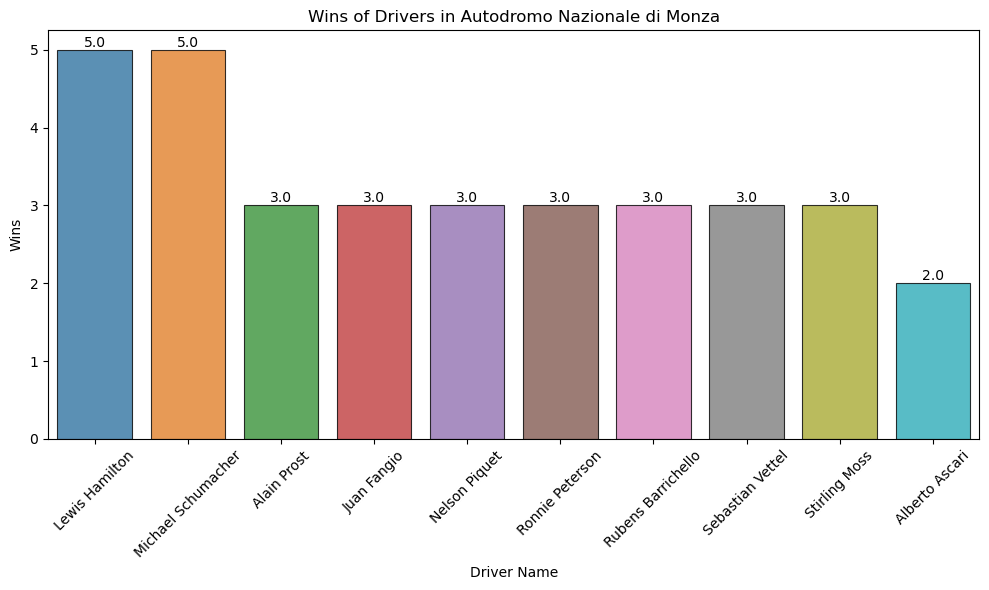

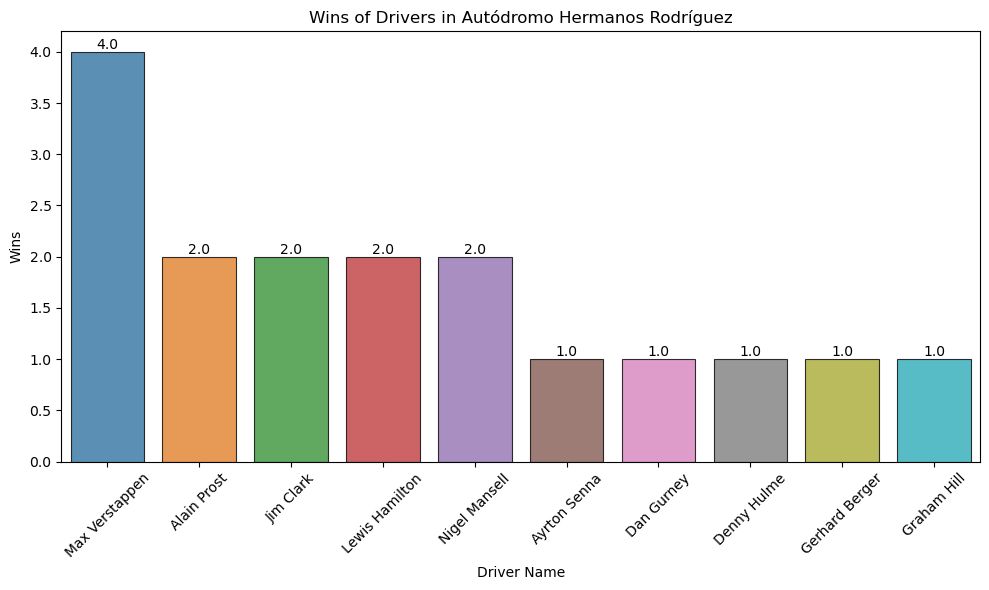

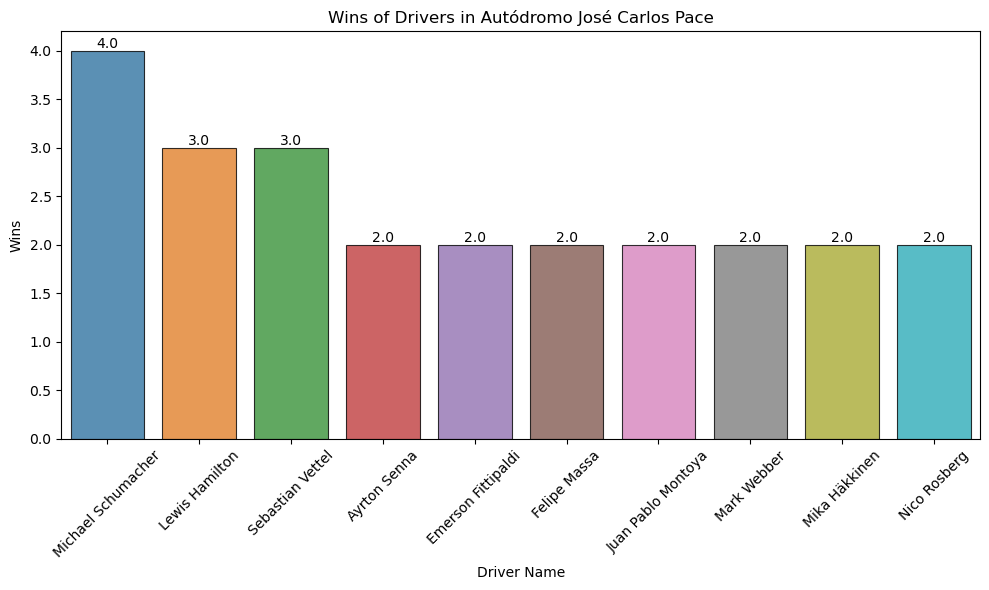

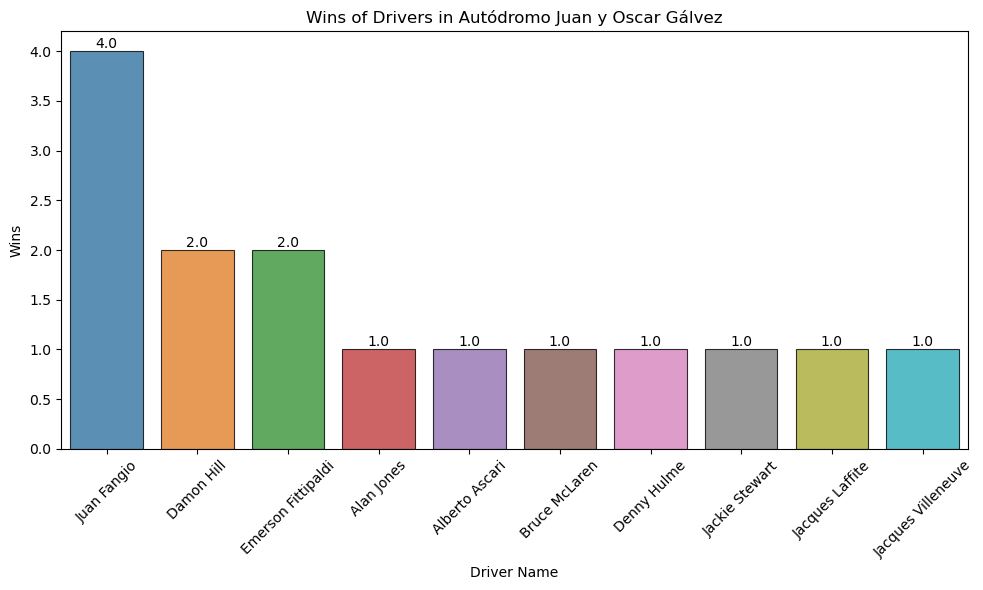

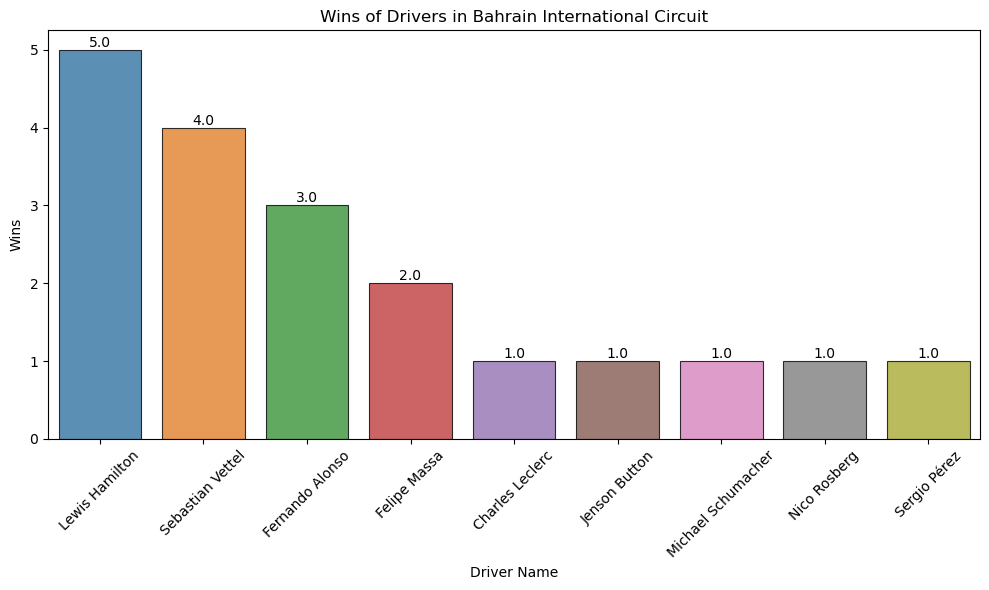

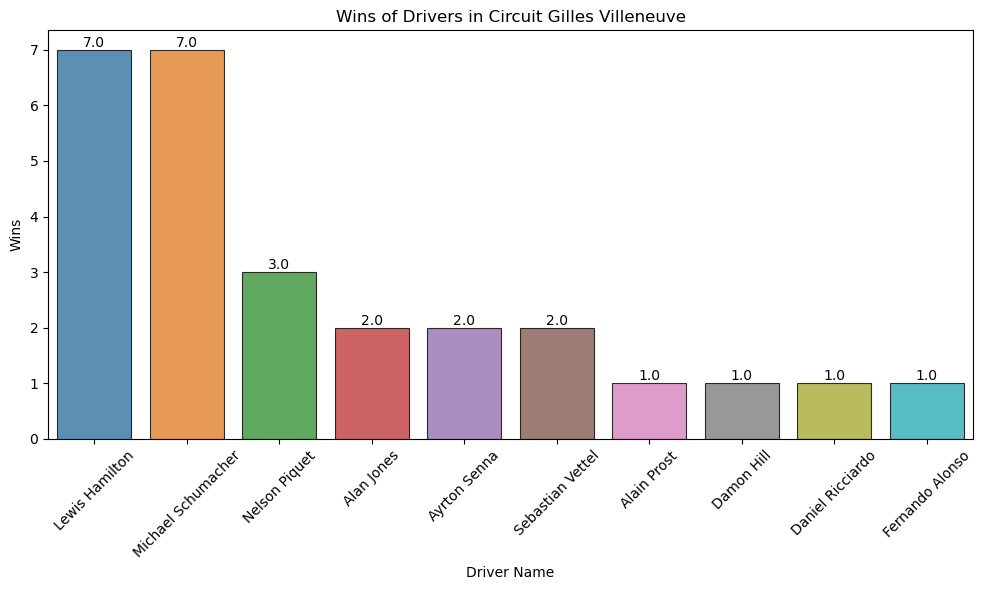

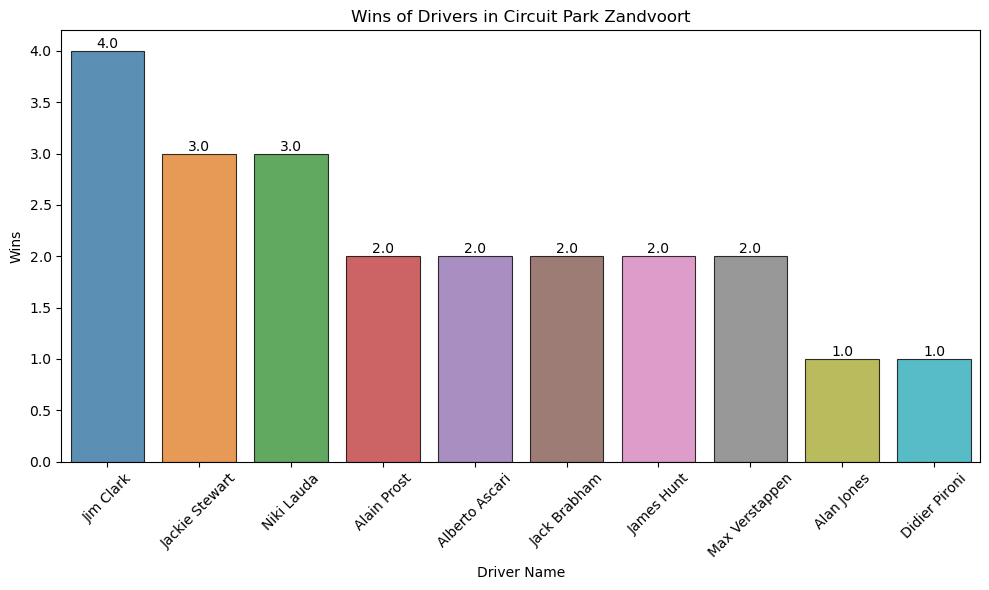

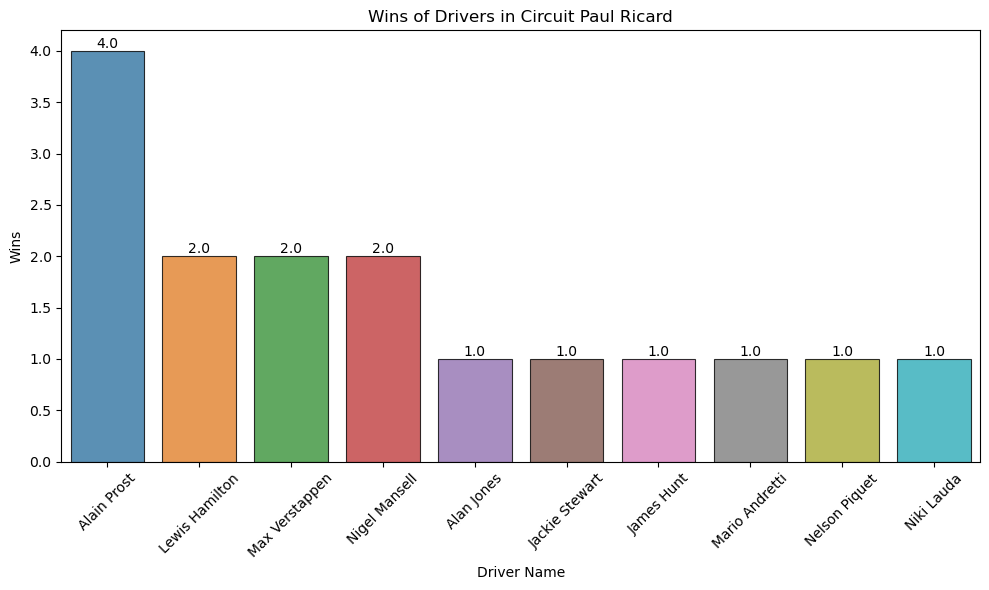

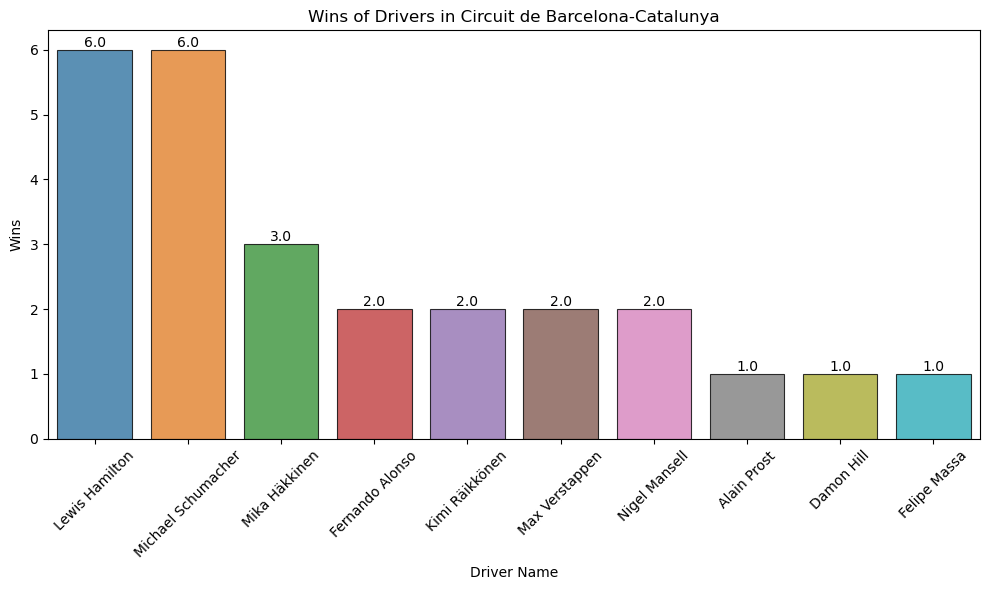

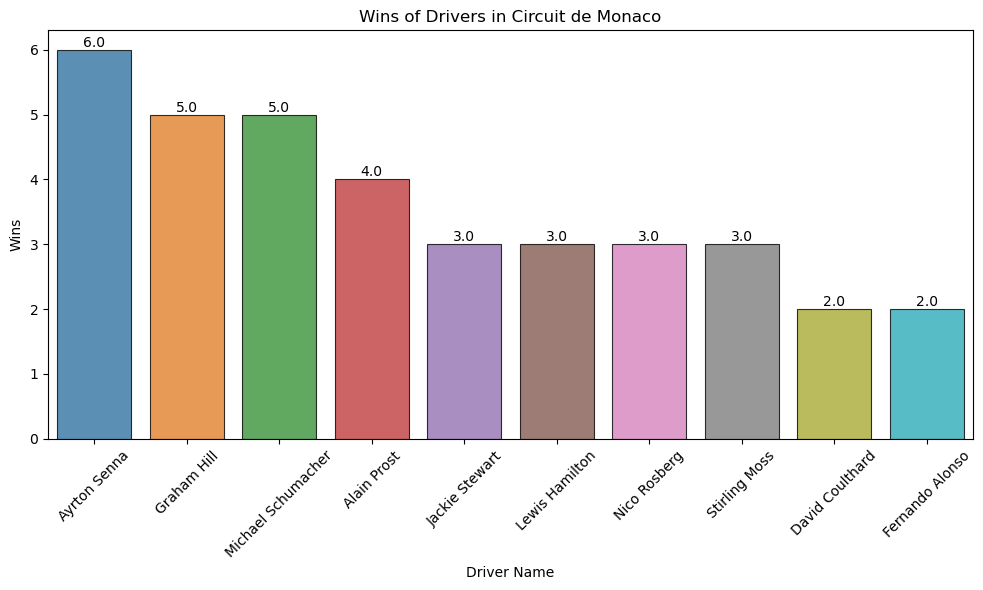

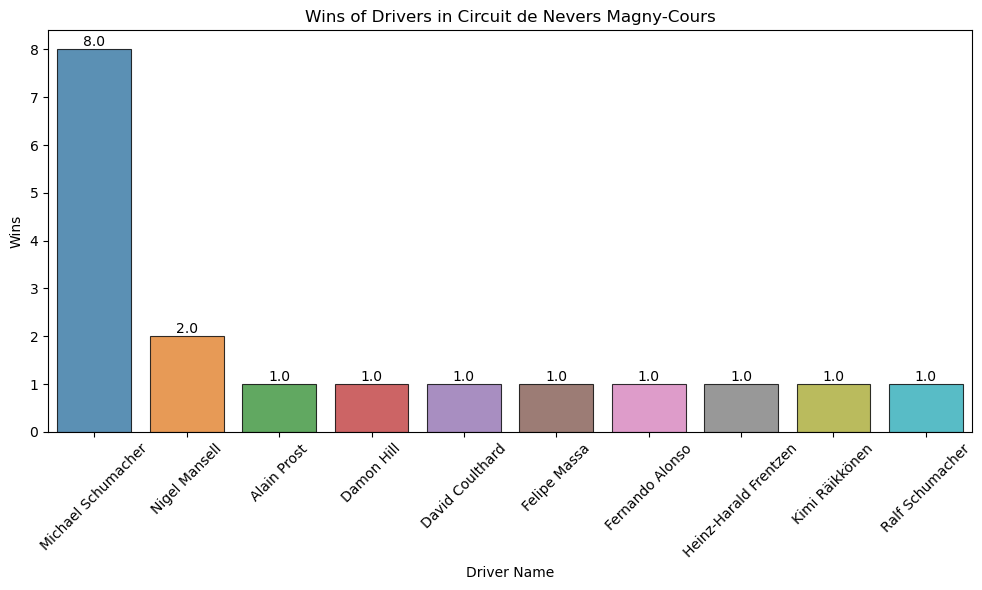

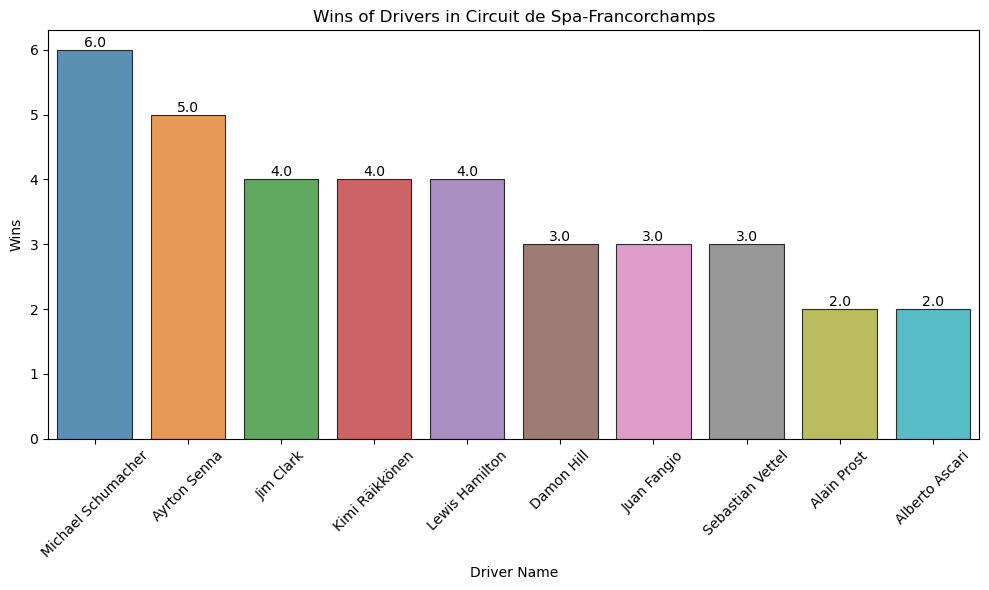

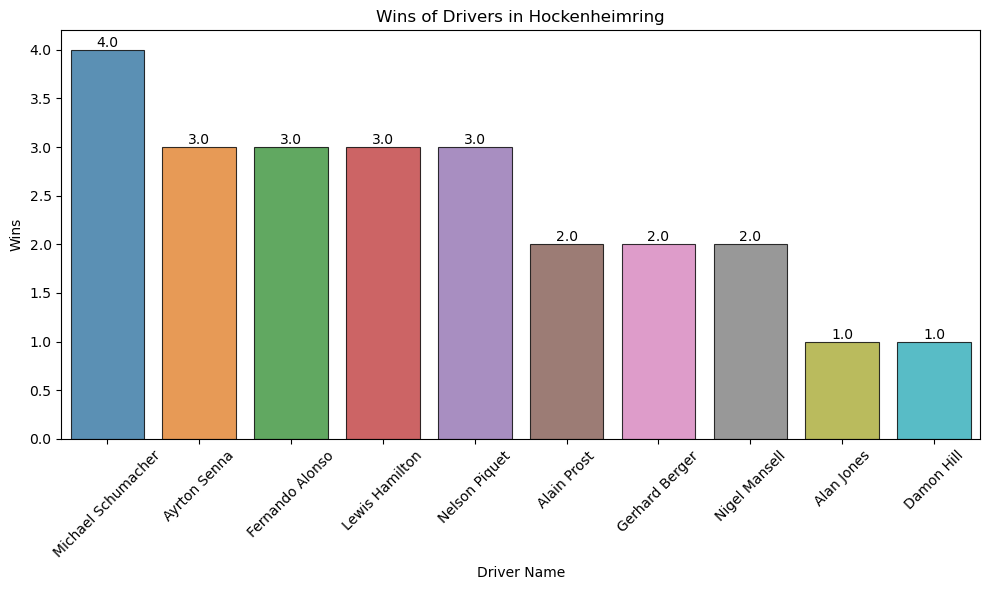

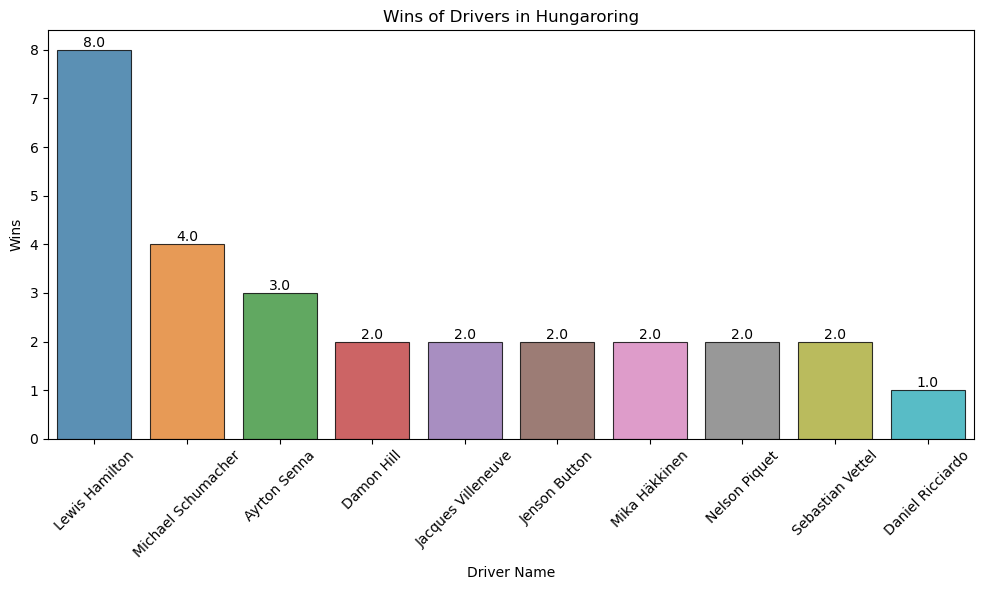

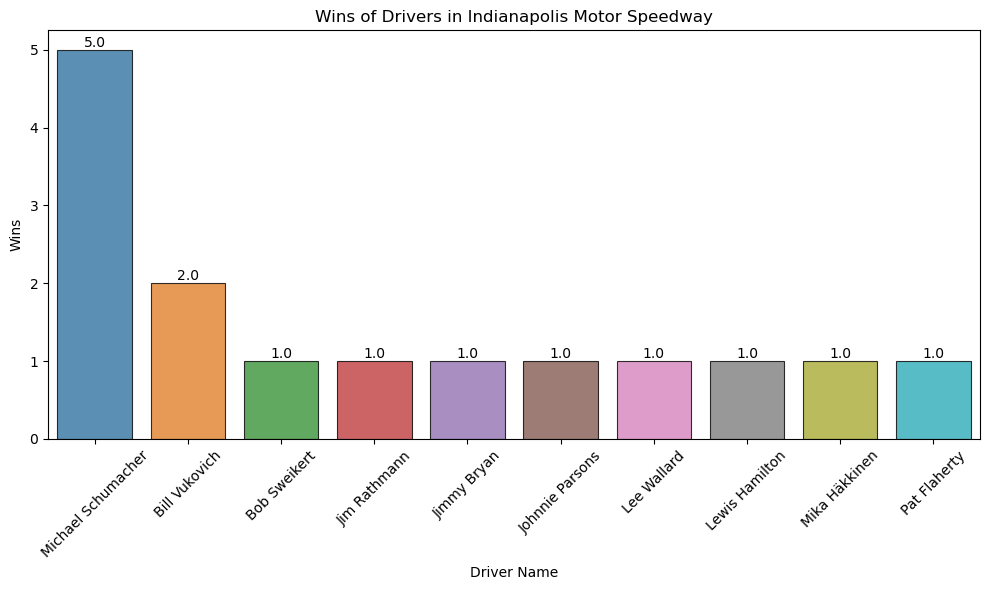

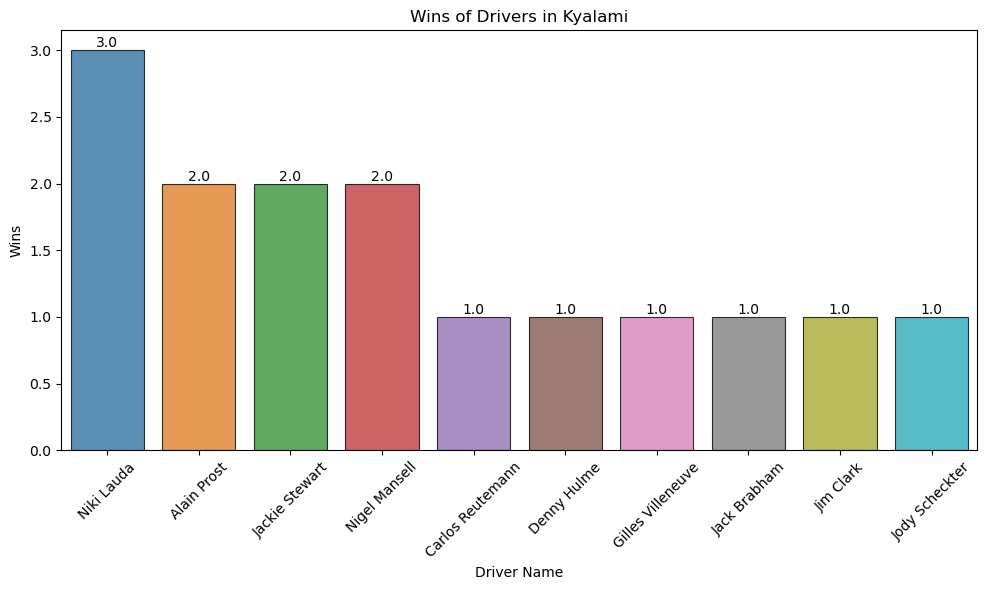

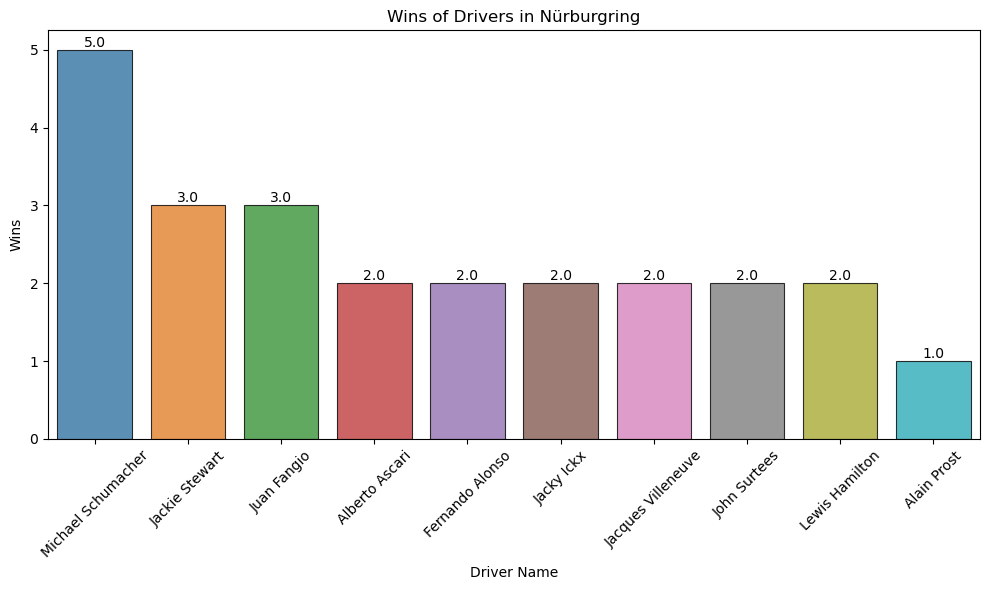

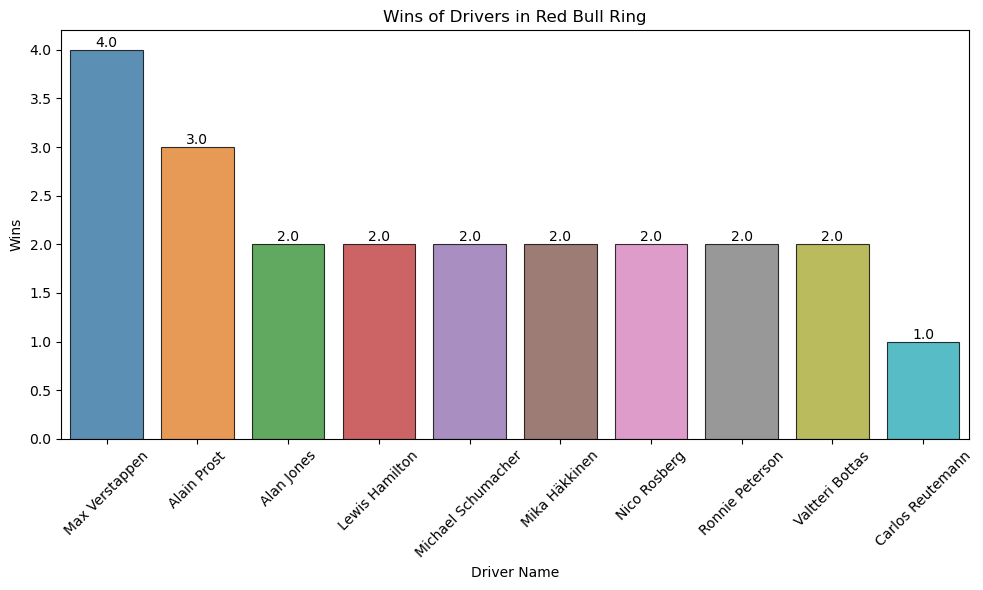

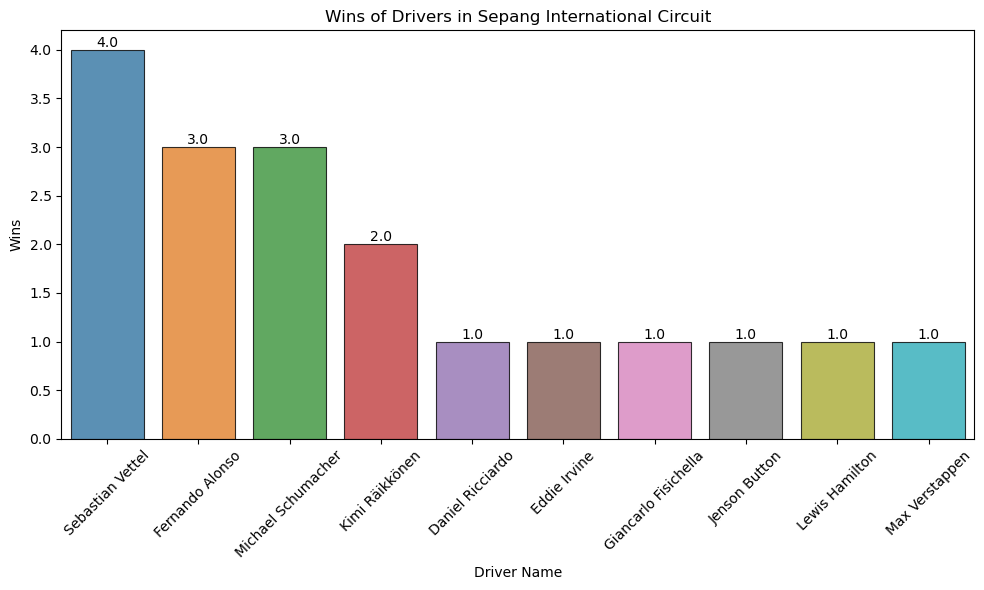

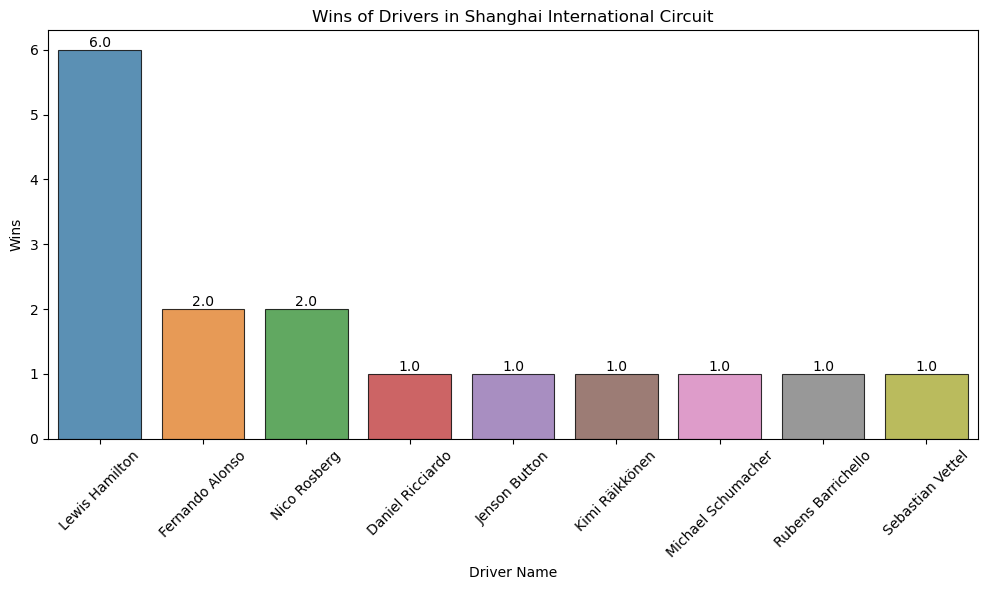

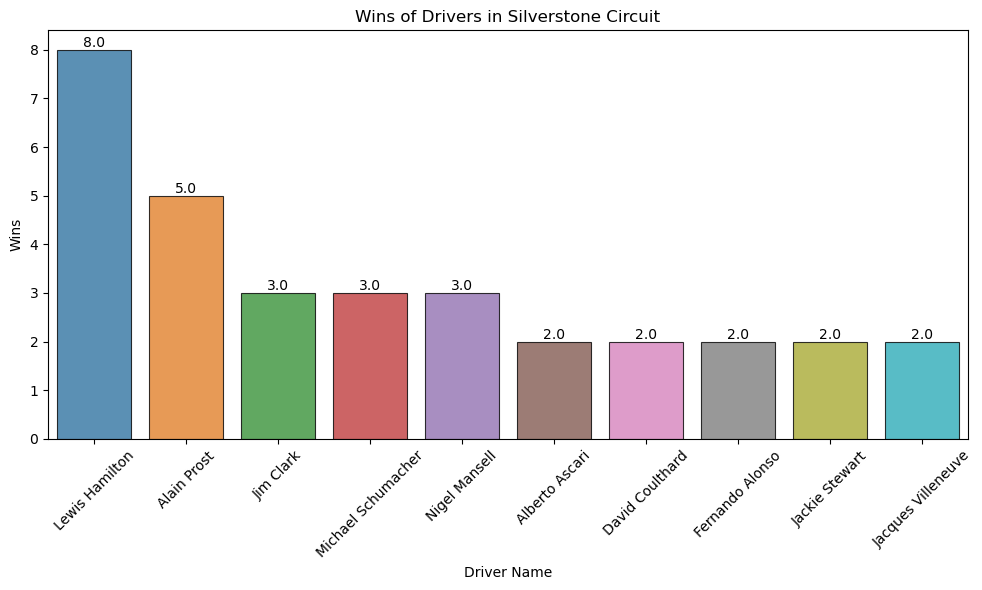

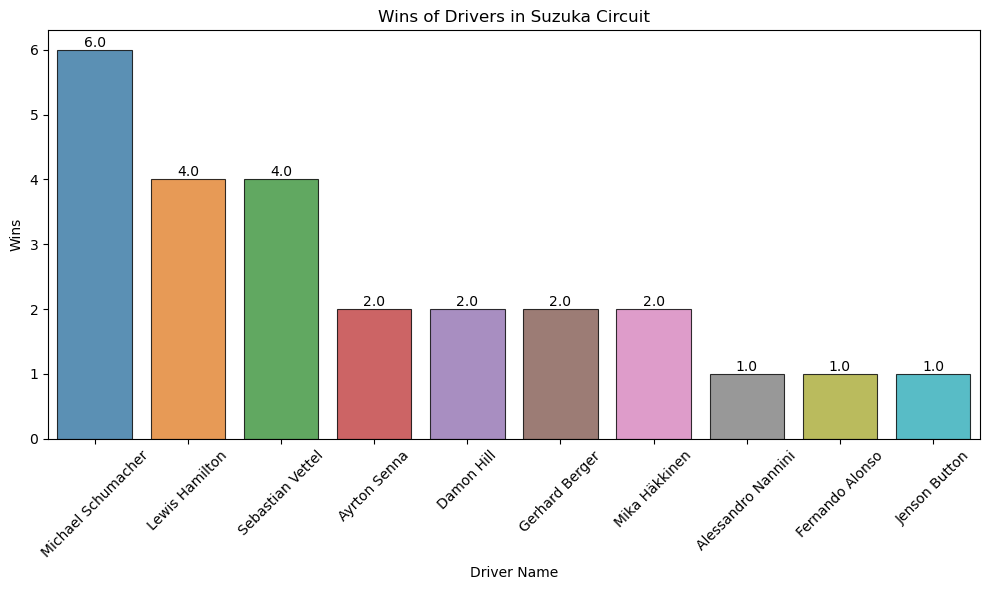

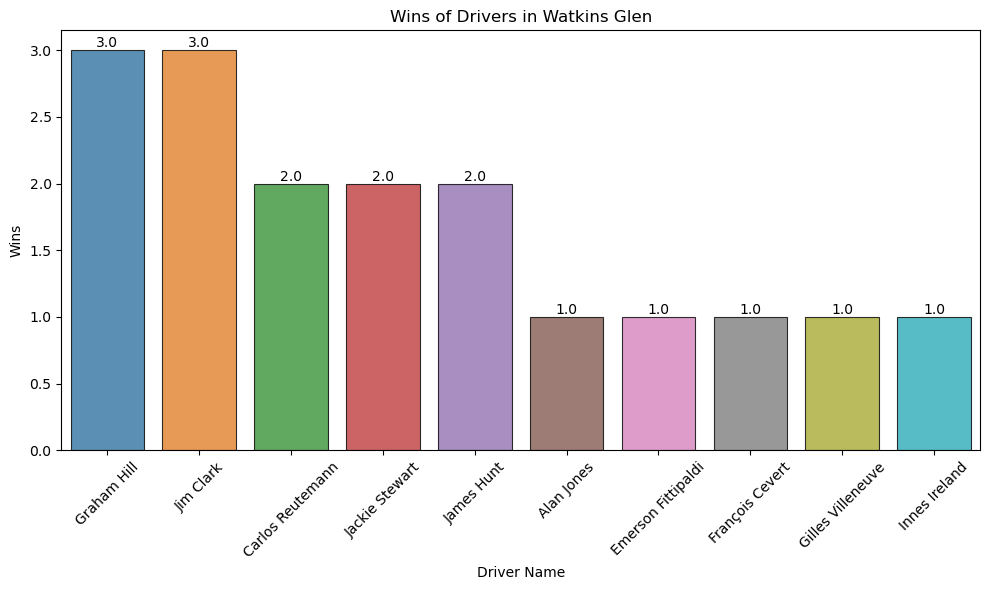

In [27]:
# Get a list of unique circuit names
circuit_names = top_circuits_top_drivers_df['circuitName'].unique()

# Create 25 bar plots, one for each circuit
for circuit in circuit_names:

    circuit_df = top_circuits_top_drivers_df[top_circuits_top_drivers_df['circuitName'] == circuit]
    
    # Created the bar plot using seaborn
    plot.figure(figsize=(10, 6))
    ax = sb.barplot(data=circuit_df, x='driver_name', y='No of Wins', alpha=0.8, linewidth=0.8, edgecolor='black')
    plot.xticks(rotation=45)
    plot.xlabel('Driver Name')
    plot.ylabel('Wins')
    plot.title(f'Wins of Drivers in {circuit}')
    plot.tight_layout()

    # Adding data labels 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

    plot.show()

    

In [28]:
# Win analysis of top constructors for each top 25 circuits 

# fetching wins of constructors on circuits 

constructor_wins_count = top_circuits_df[top_circuits_df['finalPosition']==1].groupby(['circuitLocation' , 'circuitName','constructor_name'])['finalPosition'].count()
constructor_wins_count.head(60)

circuitLocation  circuitName                    constructor_name
Budapest         Hungaroring                    Alpine F1 Team       1
                                                Benetton             1
                                                Ferrari              7
                                                Honda                1
                                                McLaren             11
                                                Mercedes             5
                                                Red Bull             3
                                                Renault              1
                                                Williams             7
Buenos Aires     Autódromo Juan y Oscar Gálvez  Brabham              1
                                                Cooper               1
                                                Cooper-Climax        1
                                                Ferrari              4
            

In [29]:
# fetching top constructors from each circuit who have won the most 

top_10_sorted_constructor_wins = constructor_wins_count.groupby('circuitName').nlargest(10).reset_index(level=0, drop=True)
top_10_sorted_constructor_wins.head(60)

circuitLocation  circuitName                     constructor_name
Melbourne        Albert Park Grand Prix Circuit  Ferrari              9
                                                 McLaren              6
                                                 Mercedes             4
                                                 Renault              2
                                                 Brawn                1
                                                 Lotus F1             1
                                                 Red Bull             1
                                                 Williams             1
Imola            Autodromo Enzo e Dino Ferrari   Ferrari              8
                                                 Williams             8
                                                 McLaren              6
                                                 Brabham              2
                                                 Red Bull             

In [30]:
# Making a dataframe of the constructors from top 25 circuits  

top_circuits_top_constructor_df = pd.DataFrame(top_10_sorted_constructor_wins)
top_circuits_top_constructor_df = top_circuits_top_constructor_df.reset_index()
top_circuits_top_constructor_df.rename(columns = {'finalPosition': 'No of Wins'}, inplace= True)
top_circuits_top_constructor_df.head(60)

circuitLocation                     circuitName constructor_name  \
0        Melbourne  Albert Park Grand Prix Circuit          Ferrari   
1        Melbourne  Albert Park Grand Prix Circuit          McLaren   
2        Melbourne  Albert Park Grand Prix Circuit         Mercedes   
3        Melbourne  Albert Park Grand Prix Circuit          Renault   
4        Melbourne  Albert Park Grand Prix Circuit            Brawn   
5        Melbourne  Albert Park Grand Prix Circuit         Lotus F1   
6        Melbourne  Albert Park Grand Prix Circuit         Red Bull   
7        Melbourne  Albert Park Grand Prix Circuit         Williams   
8            Imola   Autodromo Enzo e Dino Ferrari          Ferrari   
9            Imola   Autodromo Enzo e Dino Ferrari         Williams   
10           Imola   Autodromo Enzo e Dino Ferrari          McLaren   
11           Imola   Autodromo Enzo e Dino Ferrari          Brabham   
12           Imola   Autodromo Enzo e Dino Ferrari         Red Bull   
13           Imola   Autodromo Enzo e Dino Ferrari         Benetton   
14           Imola   Autodromo Enzo e Dino Ferrari         Mercedes   
15           Imola   Autodromo Enzo e Dino Ferrari          Renault   
16           Imola   Autodromo Enzo e Dino Ferrari       Team Lotus   
17           Monza    Autodromo Nazionale di Monza          Ferrari   
18           Monza    Autodromo Nazionale di Monza          McLaren   
19           Monza    Autodromo Nazionale di Monza         Mercedes   
20           Monza    Autodromo Nazionale di Monza         Williams   
21           Monza    Autodromo Nazionale di Monza       Team Lotus   
22           Monza    Autodromo Nazionale di Monza              BRM   
23           Monza    Autodromo Nazionale di Monza         Red Bull   
24           Monza    Autodromo Nazionale di Monza          Brabham   
25           Monza    Autodromo Nazionale di Monza         Maserati   
26           Monza    Autodromo Nazionale di Monza          Renault   
27     Mexico City    Autódromo Hermanos Rodríguez         Red Bull   
28     Mexico City    Autódromo Hermanos Rodríguez         Mercedes   
29     Mexico City    Autódromo Hermanos Rodríguez         Williams   
30     Mexico City    Autódromo Hermanos Rodríguez          Ferrari   
31     Mexico City    Autódromo Hermanos Rodríguez       Lotus-Ford   
32     Mexico City    Autódromo Hermanos Rodríguez          McLaren   
33     Mexico City    Autódromo Hermanos Rodríguez         Benetton   
34     Mexico City    Autódromo Hermanos Rodríguez   Brabham-Climax   
35     Mexico City    Autódromo Hermanos Rodríguez  Cooper-Maserati   
36     Mexico City    Autódromo Hermanos Rodríguez            Honda   
37       São Paulo      Autódromo José Carlos Pace          Ferrari   
38       São Paulo      Autódromo José Carlos Pace          McLaren   
39       São Paulo      Autódromo José Carlos Pace         Mercedes   
40       São Paulo      Autódromo José Carlos Pace         Red Bull   
41       São Paulo      Autódromo José Carlos Pace         Williams   
42       São Paulo      Autódromo José Carlos Pace         Benetton   
43       São Paulo      Autódromo José Carlos Pace          Brabham   
44       São Paulo      Autódromo José Carlos Pace           Jordan   
45       São Paulo      Autódromo José Carlos Pace           Ligier   
46       São Paulo      Autódromo José Carlos Pace          Renault   
47    Buenos Aires   Autódromo Juan y Oscar Gálvez          Ferrari   
48    Buenos Aires   Autódromo Juan y Oscar Gálvez         Williams   
49    Buenos Aires   Autódromo Juan y Oscar Gálvez         Maserati   
50    Buenos Aires   Autódromo Juan y Oscar Gálvez          McLaren   
51    Buenos Aires   Autódromo Juan y Oscar Gálvez       Team Lotus   
52    Buenos Aires   Autódromo Juan y Oscar Gálvez          Brabham   
53    Buenos Aires   Autódromo Juan y Oscar Gálvez           Cooper   
54    Buenos Aires   Autódromo Juan y Oscar Gálvez    Cooper-Climax   
55    Buenos Aires   Autódr

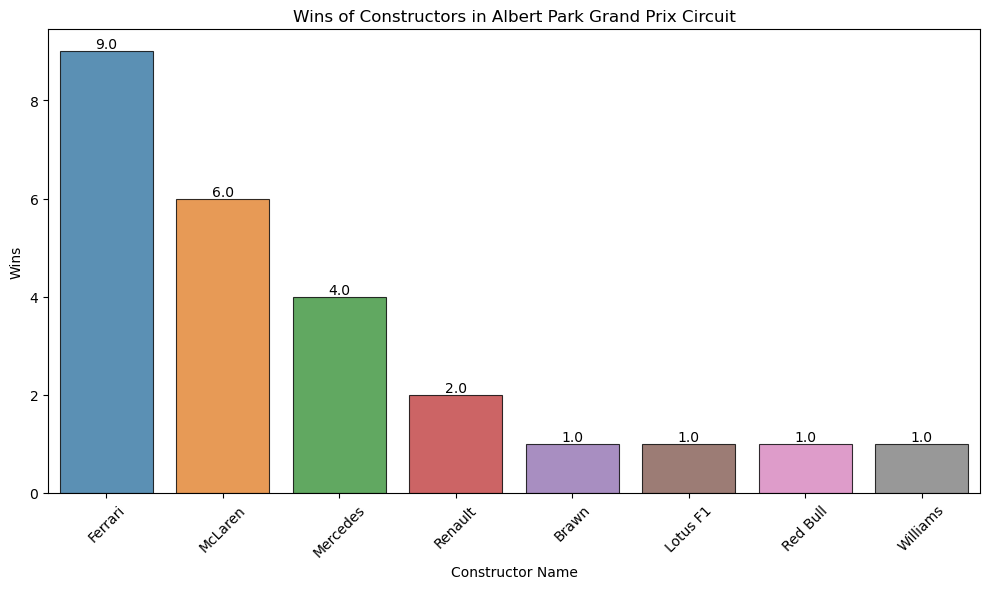

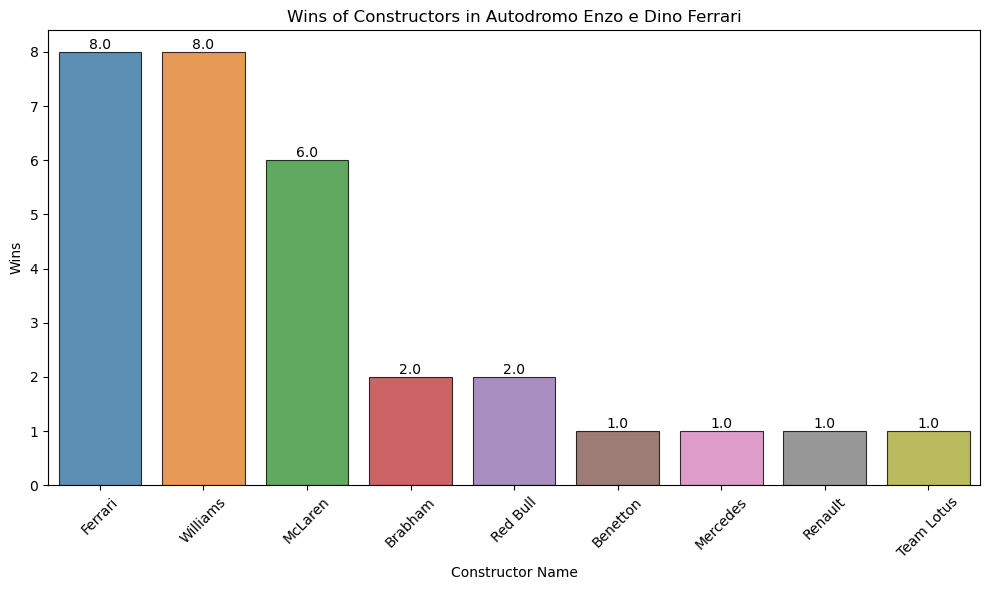

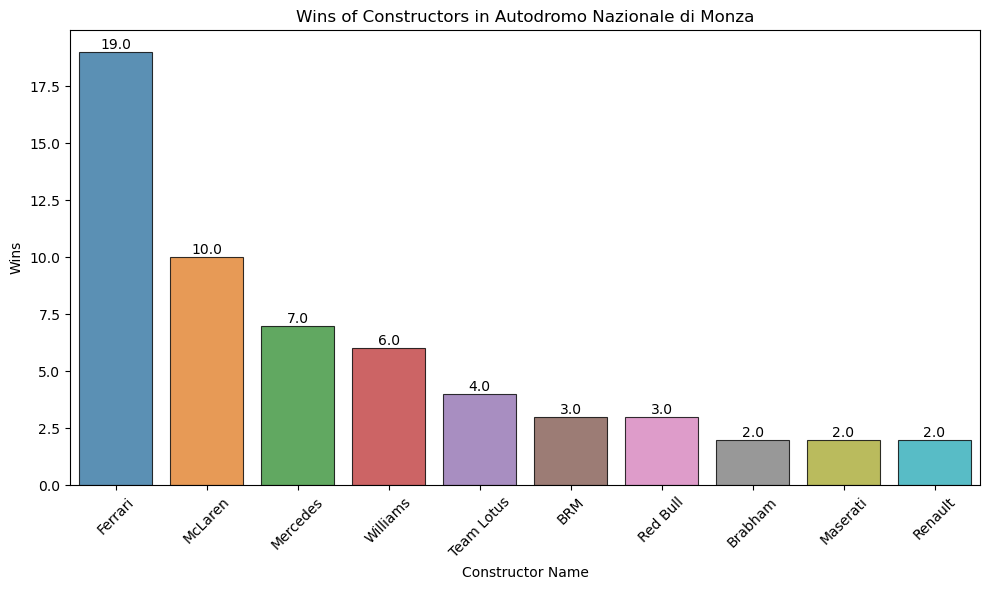

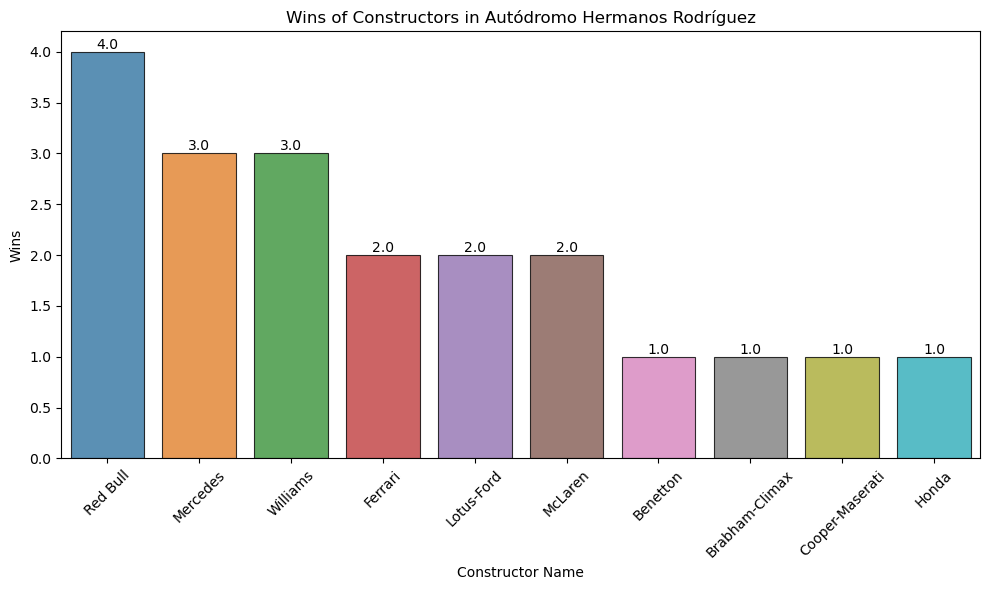

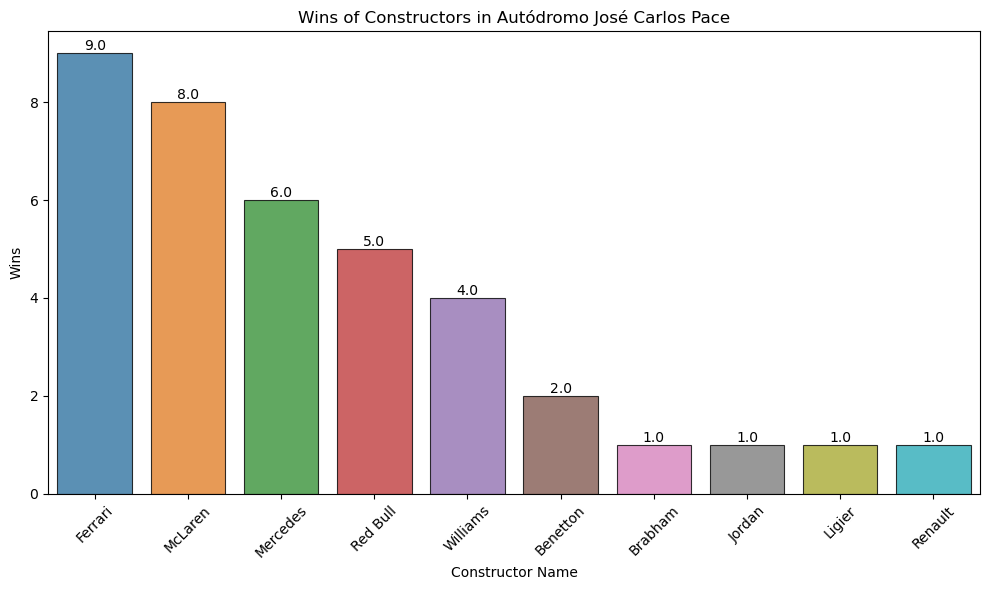

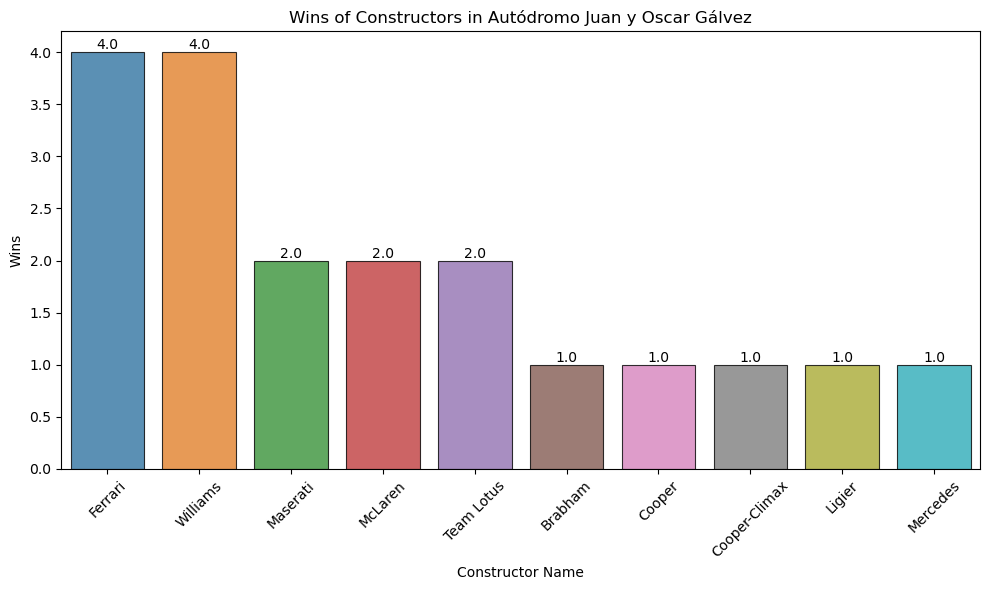

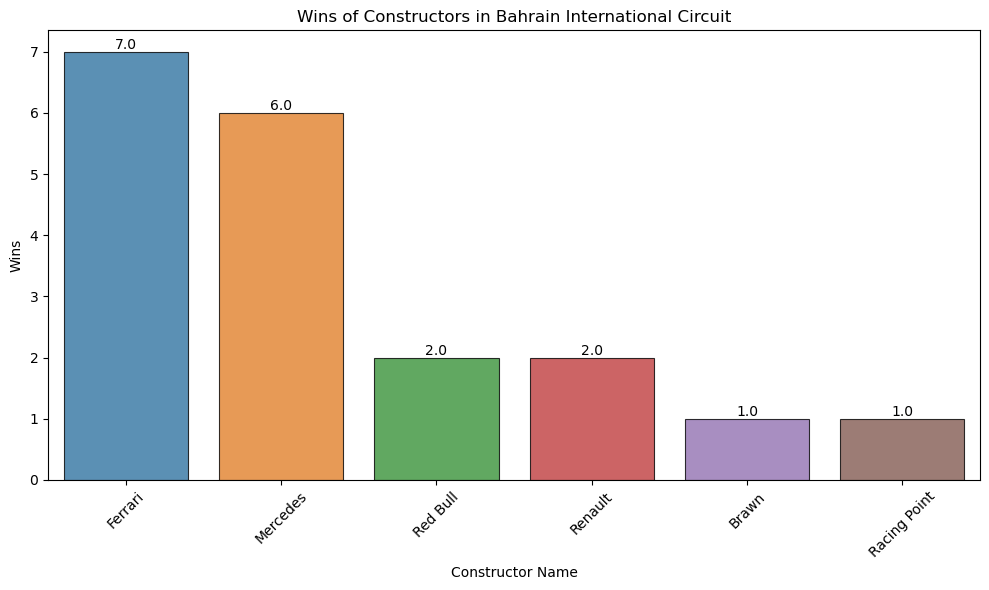

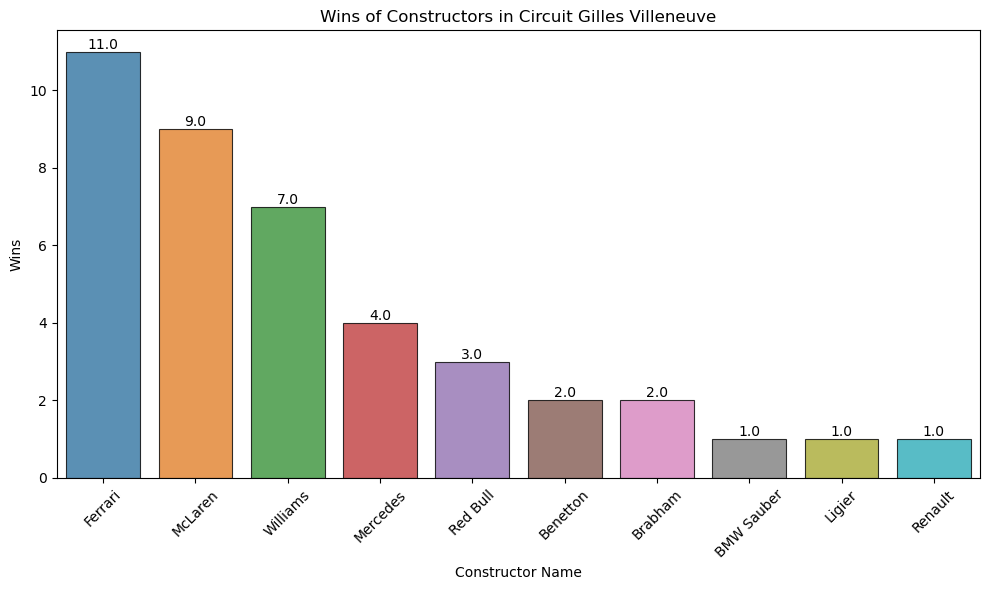

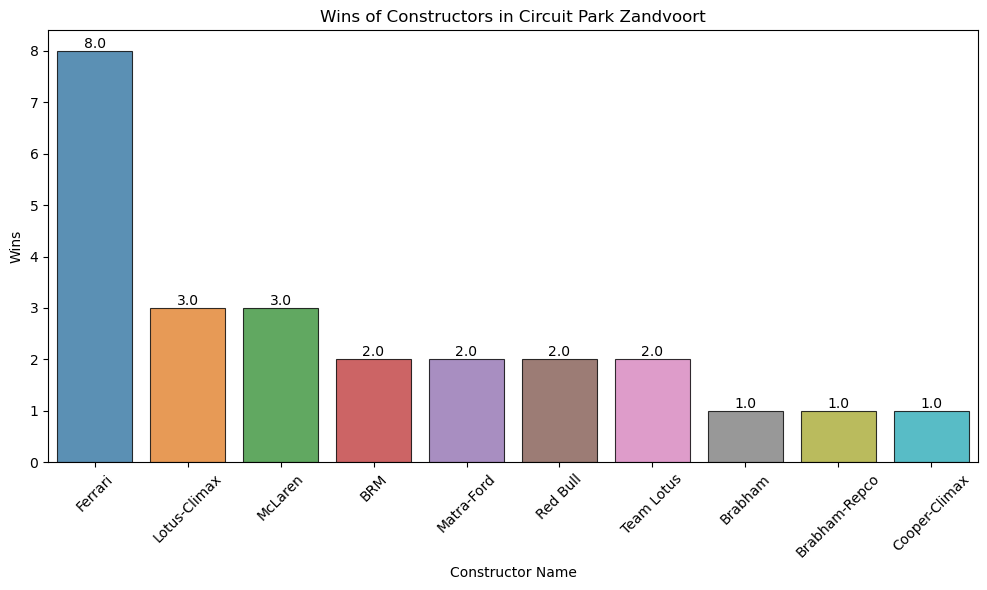

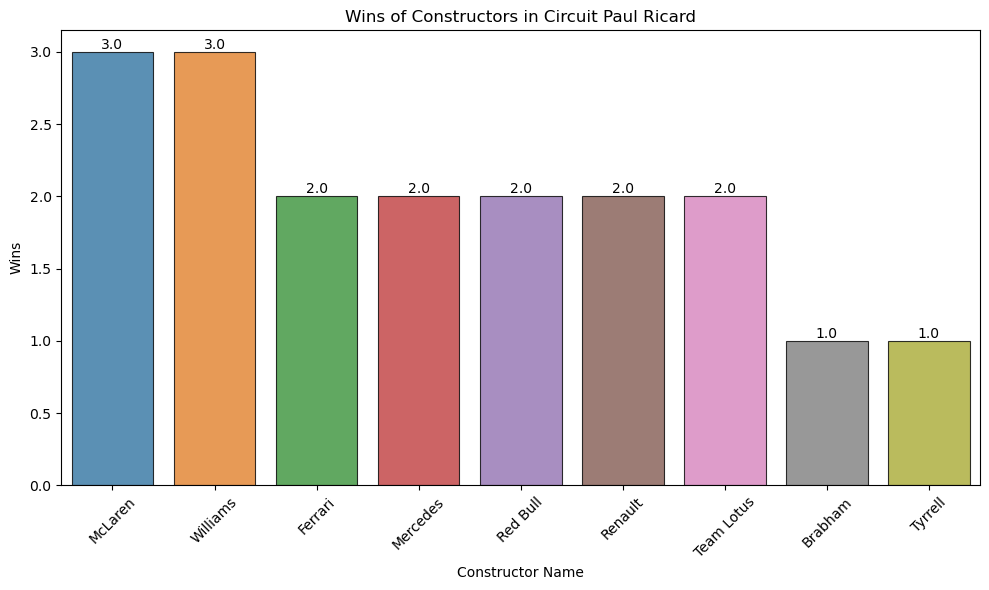

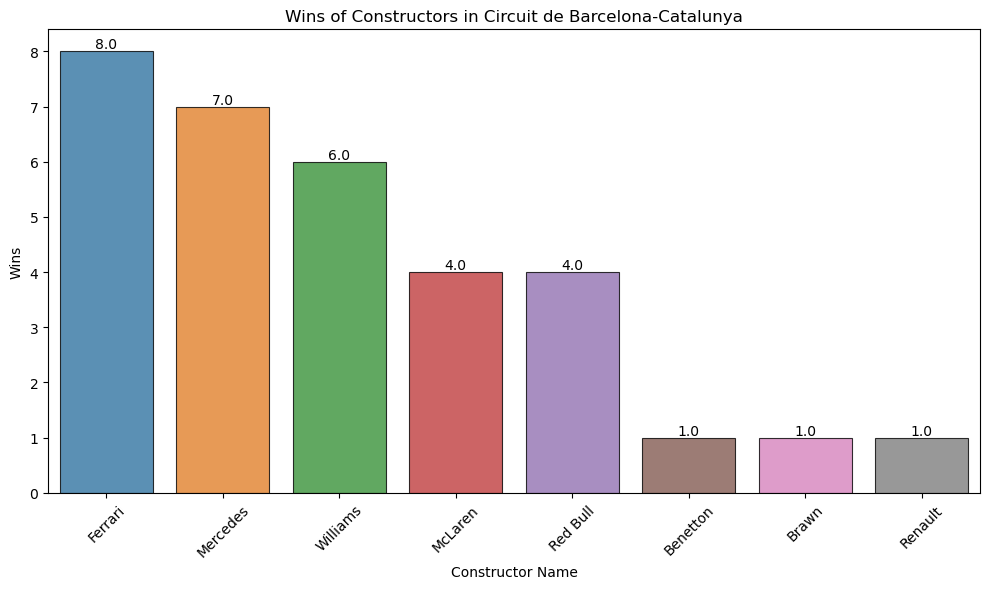

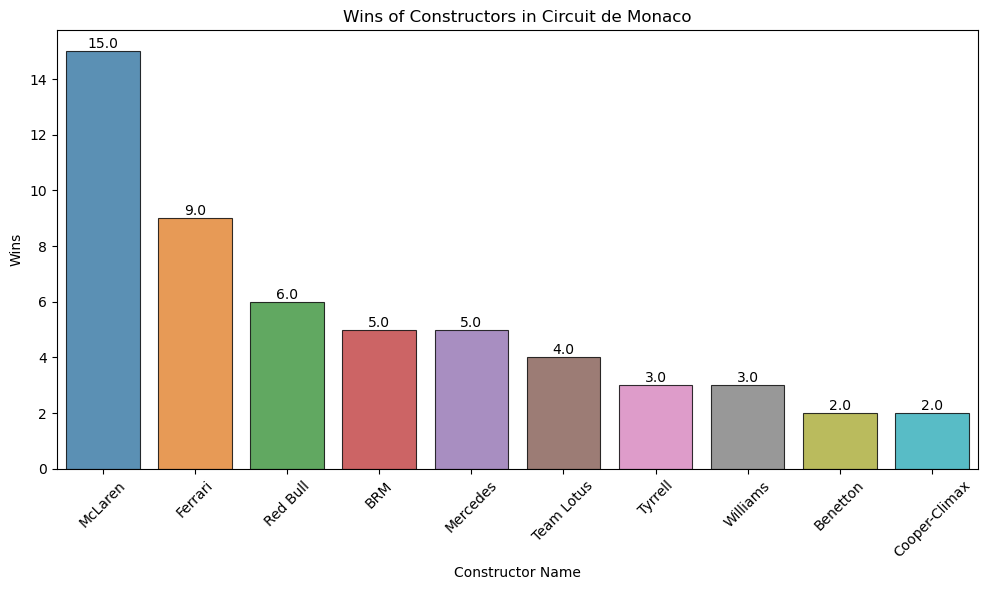

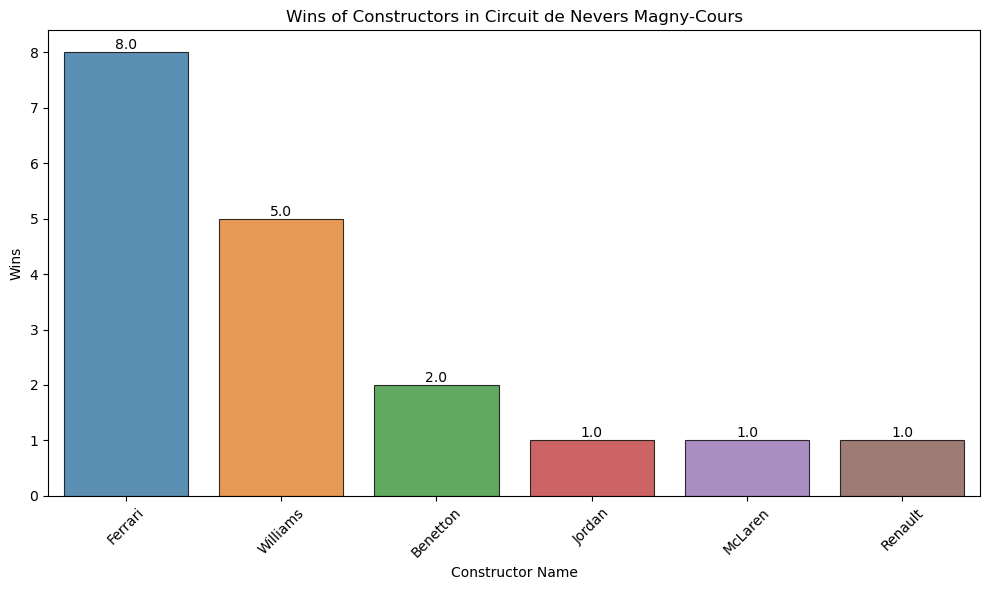

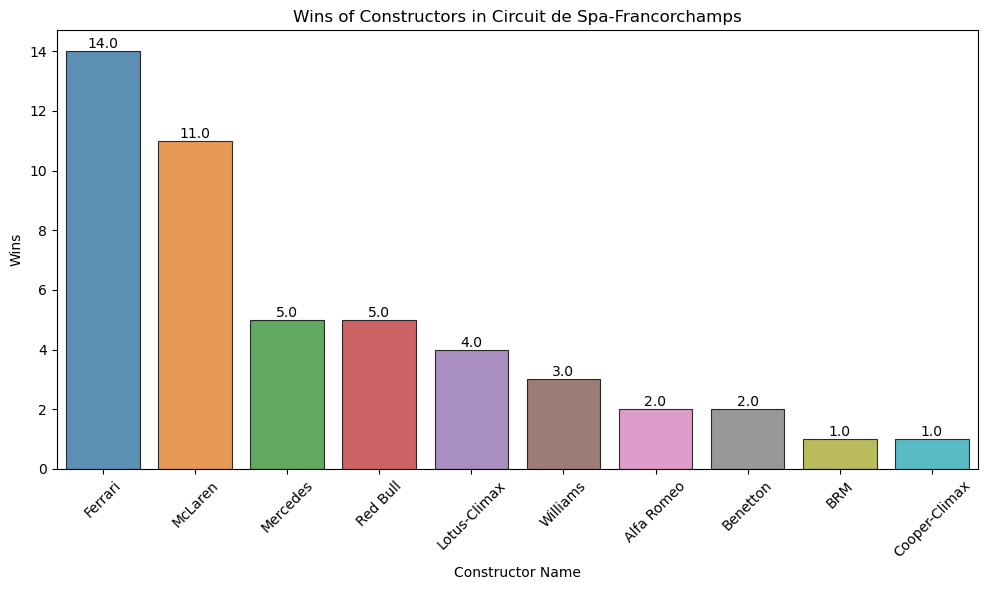

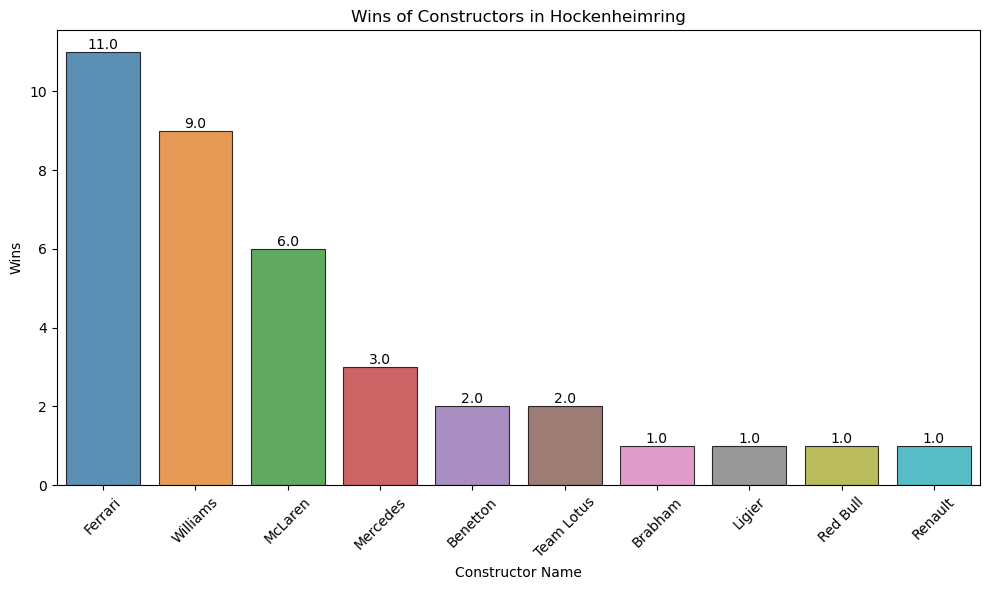

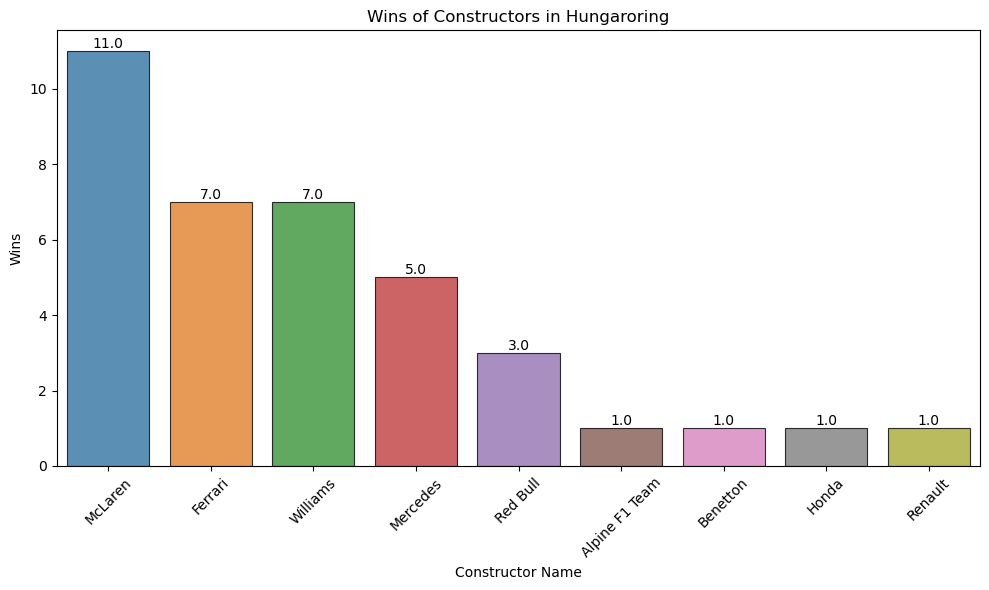

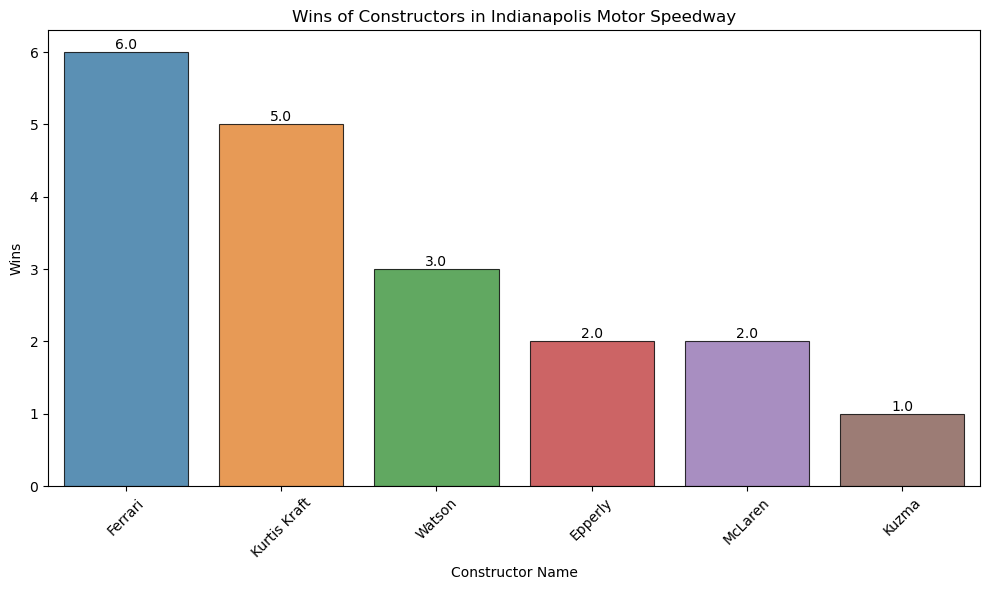

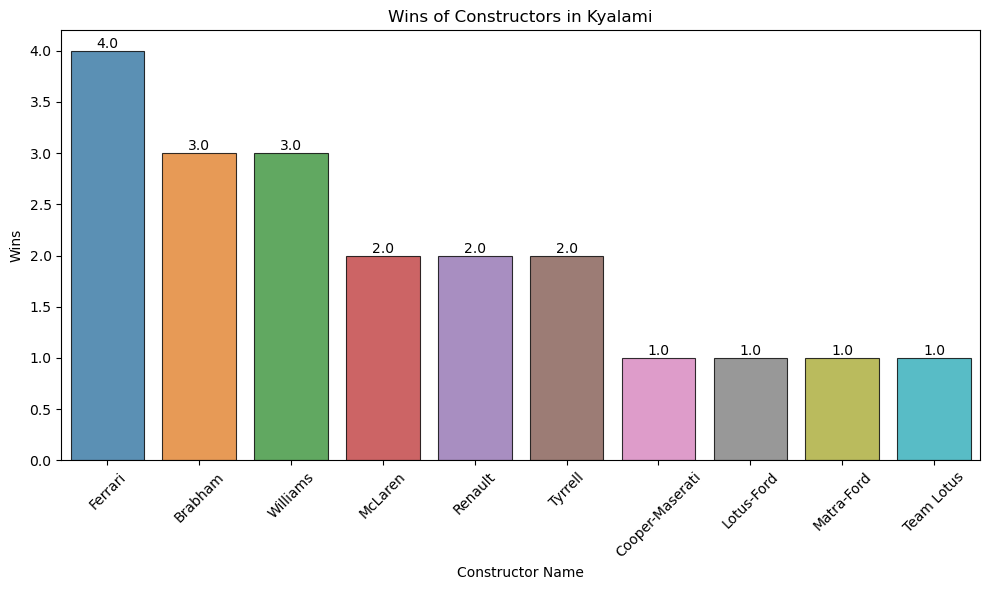

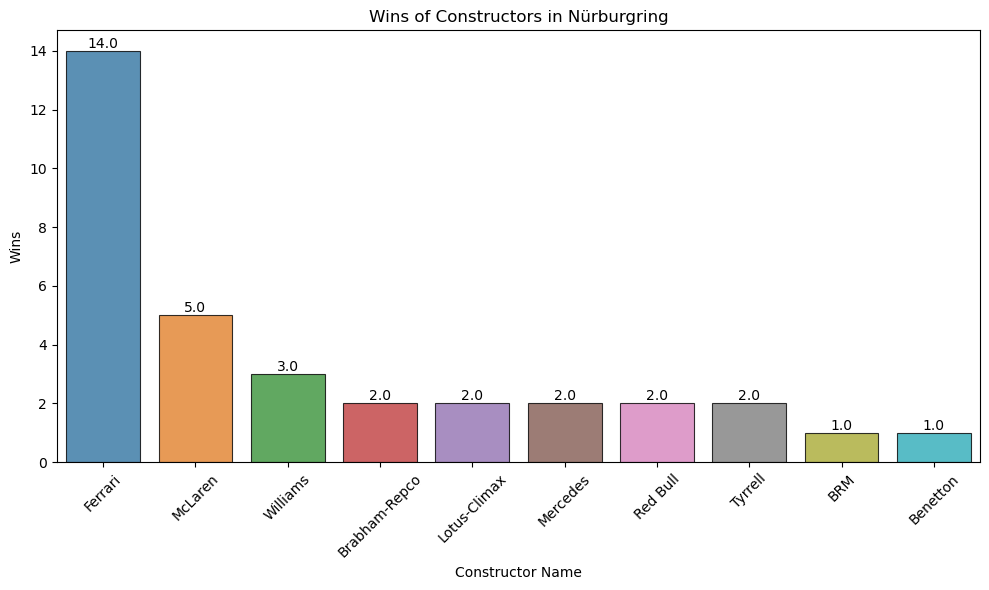

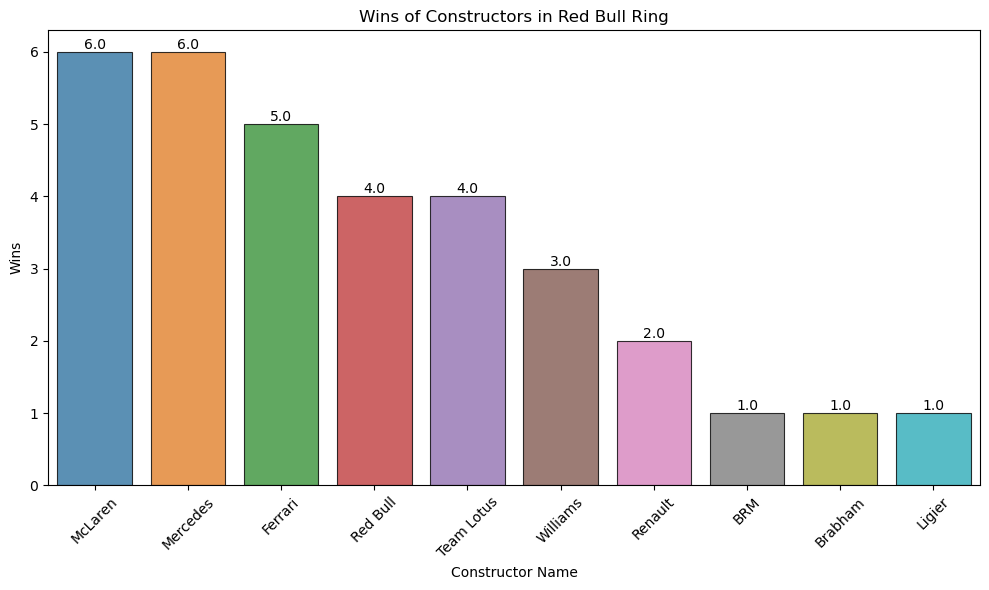

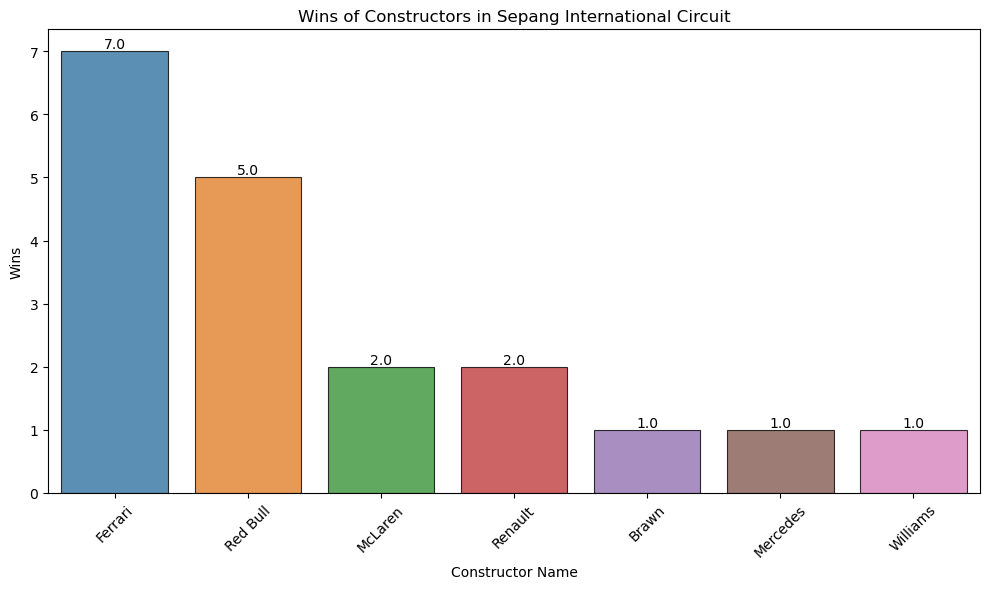

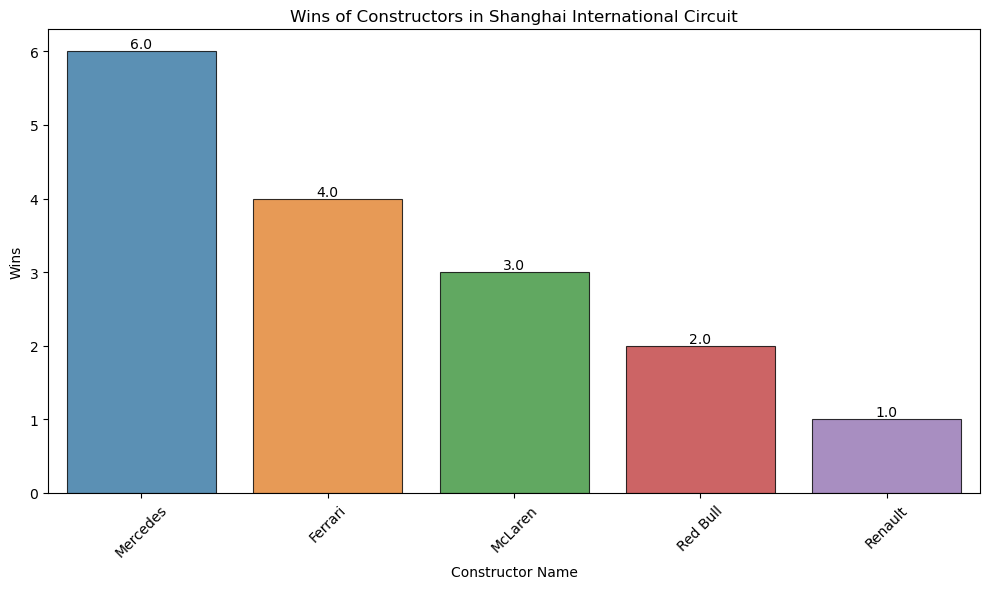

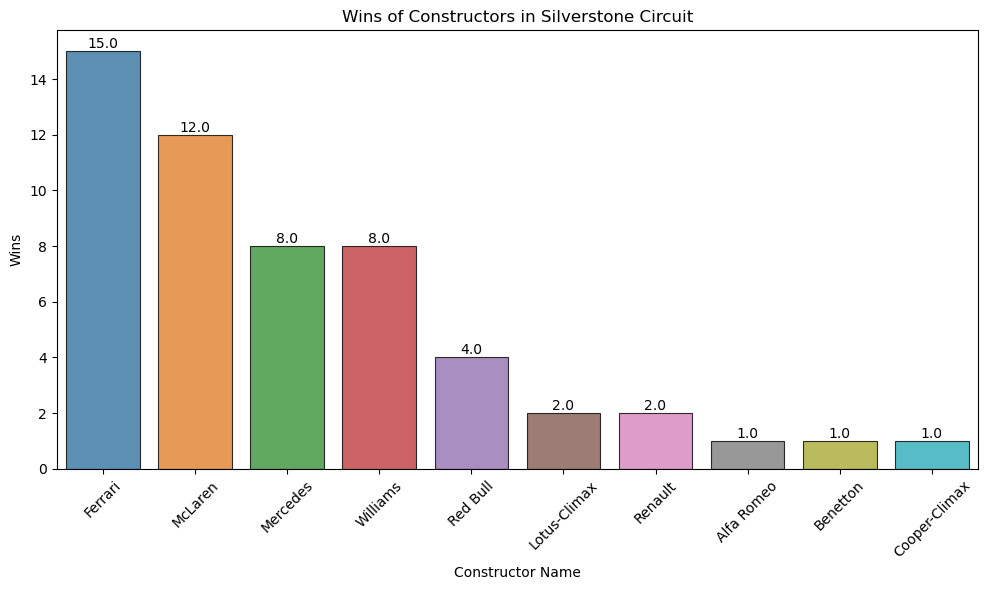

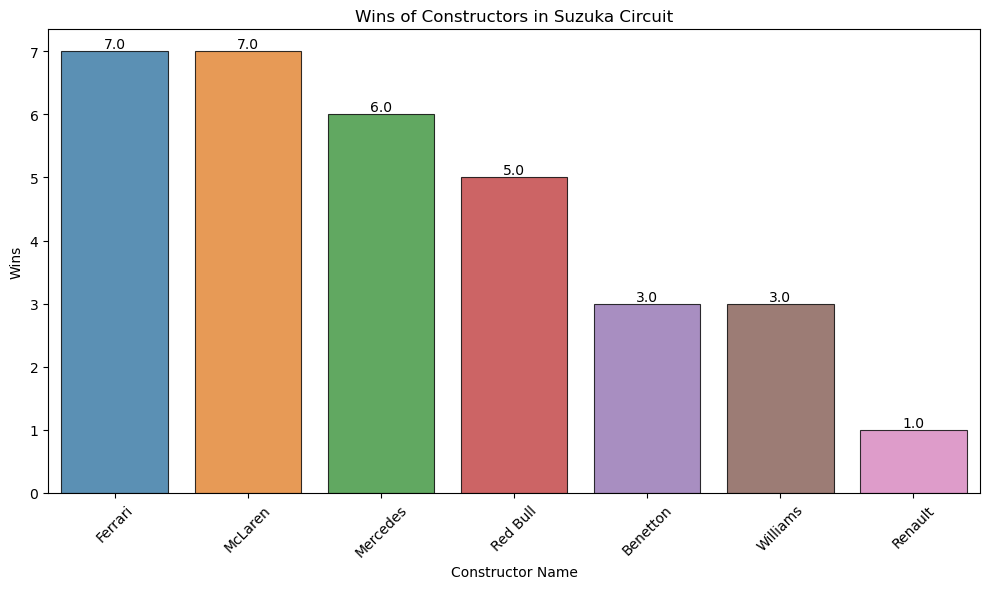

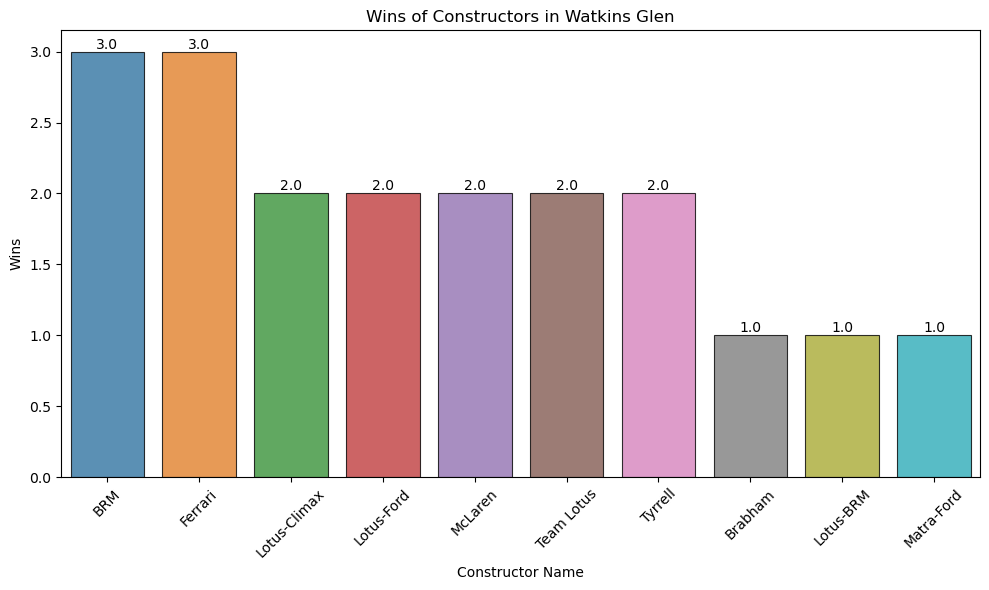

In [31]:
circuit_names = top_circuits_top_constructor_df['circuitName'].unique()

#25 bar plots one for each circuit
for circuit in circuit_names:

    circuit_df = top_circuits_top_constructor_df[top_circuits_top_constructor_df['circuitName'] == circuit]
    
    # Created the bar plot using seaborn
    plot.figure(figsize=(10, 6))
    ax = sb.barplot(data=circuit_df, x='constructor_name', y='No of Wins', alpha=0.8, linewidth=0.8, edgecolor='black')
    plot.xticks(rotation=45)
    plot.xlabel('Constructor Name')
    plot.ylabel('Wins')
    plot.title(f'Wins of Constructors in {circuit}')
    plot.tight_layout()

    # Adding data labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

    plot.show()
